In [1]:
# !pip install webdriver_manager

In [2]:
from selenium import webdriver
import time
from webdriver_manager.chrome import ChromeDriverManager
import re
import pandas as pd
import numpy as np
from selenium.webdriver.common.action_chains import ActionChains
from ast import literal_eval
from collections import Counter
import random
np.__version__

'1.19.5'

In [3]:
card_df = pd.read_csv('Summoner_Wars_Cards.csv', index_col=0)
card_df

,Card Name,Card Classes,Event Phase,Active Event,Abilities,Ability Text,Under,Cost,Strength,Life,Faction,Copies,Range
0,Tacullu,['Summoner'],NaN,False,['Mind Capture'],"['When this unit attacks an enemy unit, if the...",False,NaN,3.0,13.0,Breakers,1,Ranged
1,Mind Control,[],Summon Phase,False,NaN,NaN,False,0.0,NaN,NaN,Breakers,2,NaN
2,Deceiver,['Common'],NaN,False,"['Stupify', 'Engage']","['When an adjacent enemy attacks any card, if ...",False,1.0,1.0,4.0,Breakers,5,Ranged
3,Mind Witch,['Common'],NaN,False,['Mimic'],"['At the start of your Move Phase, this unit m...",False,1.0,3.0,2.0,Breakers,5,Ranged
4,Gulldune,['Champion'],NaN,False,['Telepathic Command'],"['After this unit attacks an enemy card, this ...",False,6.0,4.0,6.0,Breakers,1,Melee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Glory Caller,['Common'],NaN,False,['Call to Arms'],"['After summoning this unit, you may target a ...",False,1.0,1.0,4.0,Mountain Vargath,4,Melee
236,Slagborn Fighter,['Common'],NaN,False,['Forceful Attack'],"['After this unit attacks and damages a unit, ...",False,1.0,2.0,3.0,Mountain Vargath,4,Melee
237,Battle Leader,[],Move Phase,True,NaN,NaN,False,0.0,NaN,NaN,Mountain Vargath,2,NaN
238,Marshal Forces,[],Attack Phase,False,NaN,NaN,False,0.0,NaN,NaN,Mountain Vargath,2,NaN


In [4]:
card_df['Abilities'][0]

"['Mind Capture']"

In [5]:
# literal eval treats each element as a list rather than a string
ability_list = [j for i in card_df['Abilities'][card_df['Abilities'].notnull()] for j in literal_eval(i)]
ability_list

['Mind Capture',
 'Stupify',
 'Engage',
 'Mimic',
 'Telepathic Command',
 'Flight',
 'Levitate',
 'Greater Push',
 'Steadfast',
 'Far Shot',
 'Swift',
 'Push',
 'Sly',
 'Relentless',
 'Charge',
 'Blood Runes',
 'Imbued Strength',
 'Magic Junkie',
 'Relentless',
 'Feed the Eater',
 'Immobile',
 'Cling',
 'Climb',
 'Gang Up',
 'Raise the Dead',
 'Soulless',
 'Infect',
 'Soul Shift',
 'Life Drain',
 'Summoned By Fire',
 'Wrath',
 'Immolate',
 'Blood Fury',
 'Imbued Strength',
 'Cursed',
 'Structural Shift',
 'Frost Bolt',
 'Living Gate',
 'Mobile Structure',
 'Slow',
 'Momentum',
 'Ice Shards',
 'Greater Frost Bolt',
 'Cold Snap',
 'Trample',
 'Frost Axe',
 'Spirit Bond',
 'Imbued Strength',
 'Prepare',
 'Swift Shot',
 'Momentum',
 'Imbued Life',
 'Prepare',
 'Swift Shot',
 'Inspire',
 'Withdraw',
 'Imbued Strength',
 'Trample',
 'Imbued Speed',
 'Trample',
 'Charged',
 'Commune With Spirits',
 "The Citadel's Might",
 'Heal',
 'Engage',
 'Protect',
 'Divine Shield',
 'Radiant Shot',
 'Gui

In [6]:
unique_card_ability_list = []
for i in ability_list:
    if i not in unique_card_ability_list:
        unique_card_ability_list.append(i)
len(unique_card_ability_list)

211

In [7]:
battlefield_list = card_df['Card Name'][card_df['Life'].notnull()].tolist()
battlefield_list

['Tacullu',
 'Deceiver',
 'Mind Witch',
 'Gulldune',
 'Gwalark',
 'Kalal',
 'Wind Archer',
 'Wind Mage',
 'Sneeks',
 'Horde Slinger',
 'Beast Rider',
 'Blarf',
 'Smeg',
 'The Eater',
 'Clinger',
 'Horde Climber',
 'Ret-Talus',
 'Undead Carrier',
 'Undead Archer',
 'Dragos',
 'Elut-Bal',
 'Gul-Dass',
 'Hellfire Cultist',
 'Undead Warrior',
 'Svara',
 'Frost Mage',
 'Ice Golem',
 'Jarmund',
 'Nadiana',
 'Ollag',
 'Bear Cavalry',
 'Ice Smith',
 'Parapet',
 'Abua Shi',
 'Border Archer',
 'Lioness',
 'Makeinda Ru',
 'Miti Kyru',
 'Miti Mumway',
 'Rhinoceros',
 'Spirit Mage',
 'Sera Eldwyn',
 'Temple Priest',
 'Citadel Knight',
 'Colleen Brighton',
 'Jacob Eldwyn',
 'Valna Stoutheart',
 'Citadel Archer',
 'Citadel Paladin',
 'Queen Maldaria',
 'Ember Archer',
 'Royal Guardian',
 'Fanessa',
 'Fire Drake',
 'Holleas',
 'Ember Beast',
 'Ember Mage',
 'Grognack',
 'Frost Shaman',
 'Tundra Fighter',
 'Ragnor',
 'Shonk',
 'Targan',
 'Smasher',
 'Tundra Charger',
 'Vlox',
 'Guild Machinist',
 'Guil

In [8]:
active_event_list = card_df['Card Name'][card_df['Active Event'] == True].tolist()
active_event_list

['Hypnotic Call',
 'Perplexing Tempest',
 'Pile On',
 'Unrelenting',
 'Sacrificial Pyre',
 'Ice Ram',
 'Chant of Entangling',
 'Chant of Weaving',
 'Holy Judgment',
 'Guarding Spirits',
 'Renewed Hope',
 'Spirit of the Phoenix',
 'Blinding Flare',
 'Divine Retribution',
 'For Glory',
 'Brutal Force',
 'Freeze',
 'Primal Fury',
 'Out of Shadows',
 'Smoke Bomb',
 'Gathering Song',
 'Battle Song',
 'Sky Assault',
 'Stimshrooms',
 'Learn',
 'Insight',
 'Psychic Assault',
 'Seek',
 'Willpower',
 'Glinting Speed',
 'Coordinate',
 'Seek the Horizon',
 'Slip By',
 'Law of Liberty',
 'Law of Loyalty',
 'Law of Sanctity',
 'Emerge',
 'Convert',
 'Death Rite',
 'Battle Leader',
 'Ramming Advance']

In [9]:
under_card_list = card_df['Card Name'][card_df['Under'] == True].tolist()
under_card_list

['Hellforged Weapon',
 'Ice Smith',
 'Hand Cannon',
 'Moto Boots',
 'Hellforged Axe',
 'Hellforged Chains',
 'Wrench Rat',
 'Mortar Upgrade',
 'Thruster Upgrade',
 'Turret Upgrade']

In [10]:
full_card_list = card_df['Card Name'].tolist()
full_card_list

['Tacullu',
 'Mind Control',
 'Deceiver',
 'Mind Witch',
 'Gulldune',
 'Gwalark',
 'Kalal',
 'Wind Archer',
 'Wind Mage',
 'Blast',
 'Hypnotic Call',
 'Perplexing Tempest',
 'Sneeks',
 'Enrage the Horde',
 'Horde Slinger',
 'Beast Rider',
 'Blarf',
 'Smeg',
 'The Eater',
 'Clinger',
 'Horde Climber',
 'Pile On',
 'Sneak',
 'Unrelenting',
 'Ret-Talus',
 'Sacrificial Pyre',
 'Undead Carrier',
 'Undead Archer',
 'Dragos',
 'Elut-Bal',
 'Gul-Dass',
 'Hellfire Cultist',
 'Undead Warrior',
 'Blood Summon',
 'Hellforged Weapon',
 'Purge',
 'Svara',
 'Ice Ram',
 'Frost Mage',
 'Ice Golem',
 'Jarmund',
 'Nadiana',
 'Ollag',
 'Bear Cavalry',
 'Ice Smith',
 'Glacial Shift',
 'Ice Repair',
 'Parapet',
 'Abua Shi',
 'Chant of Power',
 'Border Archer',
 'Lioness',
 'Makeinda Ru',
 'Miti Kyru',
 'Miti Mumway',
 'Rhinoceros',
 'Spirit Mage',
 'Chant of Entangling',
 'Chant of Growth',
 'Chant of Weaving',
 'Sera Eldwyn',
 'Holy Judgment',
 'Temple Priest',
 'Citadel Knight',
 'Colleen Brighton',
 'Jac

In [11]:
# factions listed in release order
factions = ['Breakers', 'Cave Goblins', 'Fallen Kingdom', 'Polar Dwarves', 'Savanna Elves', 'Vanguards',
            'Phoenix Elves', 'Tundra Orcs', 'Cloaks', 'Skyspear Avians', 'Fungal Dwarves', 'Eternal Council',
            'Obsidian Dwarves', 'Sand Goblins', 'Shadow Elves', 'Wayfarers', 'High Elves', 'Swamp Orcs',
             'Crimson Order', 'Mountain Vargath']

In [12]:
unit_classes = ['Summoner', 'Structure', 'Common', 'Champion']

In [13]:
df = pd.read_excel('../sw_alt_password.xlsx')

In [14]:
password = df['password'][1]
email = df['Email'][1]

In [15]:



def start_game(singleplayer, faction, opposing_faction, email, password, driver):
    url = 'https://www.plaidhatgames.com/accounts/login/?next=/redirect-swo'
    driver.get(url)



    login = driver.find_element_by_id('id_login')
    login.click()
    login.send_keys(email)
    pw = driver.find_element_by_id('id_password')
    pw.click()
    pw.send_keys(password)
    button = driver.find_element_by_class_name('primaryAction')
    button.click()
    buttons = driver.find_elements_by_class_name('menu-button-text-container')
    if singleplayer==True:
        buttons[1].click()
        # change some settings
        settings = driver.find_element_by_class_name('settings-button-left')
        settings.click()
        # auto dismiss events (can cause issues otherwise)
        autodismiss_events = driver.find_element_by_id('autodismiss_events')
        autodismiss_events.click()
        # turn on attack friendly
        attack_friendly = driver.find_element_by_id('attack_friendly')
        attack_friendly.click()
        # turn off the sound
        sound = driver.find_elements_by_id('text-size-input')
        move = ActionChains(driver)
        move.click_and_hold(sound[0]).move_by_offset(-100, 0).release().perform()
        move.click_and_hold(sound[1]).move_by_offset(-100, 0).release().perform()

        back_button = driver.find_element_by_class_name('full-overlay-back-button-img')
        back_button.click()
        buttons = driver.find_elements_by_class_name('menu-button-text-container')
        buttons[3].click()
        # select player faction 
        faction_use_button = driver.find_elements_by_xpath(f"//*[contains(text(), '{faction}')]/../../div[2]/div[1]")
        faction_use_button[0].click()
        # select opposing faction
        faction_use_button = driver.find_elements_by_xpath(f"//*[contains(text(), '{opposing_faction}')]/../../div[2]/div[1]")
        faction_use_button[0].click()
    else:
        buttons[0].click()



    

In [16]:
# function that determines whether it's your turn
def is_turn(driver):
    try:
        html = driver.page_source
        # death rite doesn't have control panel actions
        if 'Choose' in html or 'Resolve card effects' in html or 'You must discard' in html:
            return True
        driver.find_element_by_class_name('control-panel-content-actions-action')
        return True
    except:
        return False

In [17]:
# returns outer html for each space on the map
def get_board_spaces(driver):
    all_spaces = []
    for col in range(6):
        single_col_spaces = []
        for row in range(8):
            space_html = driver.find_element_by_id(f'map-space-{col}-{row}').get_attribute('outerHTML')
            if 'space-placeholder' in space_html:
                friendly = 0
                occupied = False
                card_abilities = ['']
                card_classes = ['']
            else:
                occupied = True
                
                if 'opponent' in space_html:
                    friendly = -1
            
                else:
                    friendly = 1
                    
                card = driver.find_element_by_id(f'map-space-{col}-{row}')
                card.click()
                               
    
                zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
        
                
                
                
                if 'zoom-card-ability' in zoom_html:         
                    html_card_abilities = re.findall('<div class="zoom-card-ability-name">[^<]+</div>',zoom_html)
                    regex_card_abilities = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-ability-name">'), re.escape('</div>')))
                    card_abilities = [regex_card_abilities.findall(html_card_abilities[i])[0] for i in range(len(html_card_abilities))]
                    
                    html_card_classes = re.findall('<div class="zoom-card-extras-unit">[^<]+</div>',zoom_html)
                    regex_card_classes = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-extras-unit">'), re.escape('</div>')))
                    card_classes = regex_card_classes.findall(html_card_classes[0])

                    
                    
                    if 'Structure' in zoom_html:
                        card_classes.append('Structure')

                    
                    
                else:
                    card_abilities = ['']
                    card_classes = ['Structure']

                elem = driver.find_element_by_id('zoom-card')
                ac = ActionChains(driver)
                ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
                               
            
            
            # card-name
            if 'card-name' in space_html:
                html_card_name = re.findall('alt=[^<]+><div class="card-name">',space_html)
                regex_card_name = re.compile('{}(.*){}'.format(re.escape('alt='), re.escape('><div class="card-name">')))
                card_name = regex_card_name.findall(html_card_name[0])
                card_name = card_name[0]
            else:
                card_name = ''
            
            # card-strength
            if 'card-strength' in space_html:
                html_card_strength = re.findall('<div class="card-strength">[^<]+</div>',space_html)
                regex_card_strength = re.compile('{}(.*){}'.format(re.escape('<div class="card-strength">'), re.escape('</div>')))
                card_strength = regex_card_strength.findall(html_card_strength[0])
                card_strength = card_strength[0]
            else:
                card_strength=0
            
            # card-life
            if 'card-life' in space_html:
                html_card_life = re.findall('<div class="card-life[^<]+</div>',space_html)
                regex_card_life = re.compile('{}(.*){}'.format(re.escape('>'), re.escape('</div>')))
                card_life = regex_card_life.findall(html_card_life[0])
                card_life = card_life[0]
            else:
                card_life=0
            # boost
            if 'boost' in space_html:
                html_card_boost = re.findall('<div class="boost">[^<]+</div>',space_html)
                regex_card_boost = re.compile('{}(.*){}'.format(re.escape('<div class="boost">'), re.escape('</div>')))
                boost = regex_card_boost.findall(html_card_boost[0])
                boost = boost[0]
            else:
                boost=0
                
            # only obtain the cards that go under other cards (other stuff covered by active events and such)
            under_cards = []
            if 'data-icon' in space_html:
                html_icons = re.findall('data-icon=[^ ]+ ',space_html)
                regex_icons = re.compile('{}(.*){}'.format(re.escape('data-icon="'), re.escape('" ')))
                card_icons = [regex_icons.findall(html_icons[i])[0] for i in range(len(html_icons))]
                for card_icon in card_icons:
                    # click on the icon
                    driver.find_element_by_css_selector(f"svg[data-icon={card_icon}]").click()
                    zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
                    html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
                    regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
                    card_name = regex_card_name.findall(html_card_name[0])
                    if card_name[0] in under_card_list:
                        under_cards.append(card_name[0])
                    elem = driver.find_element_by_id('zoom-card')
                    ac = ActionChains(driver)
                    ac.move_to_element(elem).move_by_offset(300, 400).click().perform()



            single_col_spaces.append([occupied, friendly, card_name, card_strength, card_life, boost, card_abilities,
                                      card_classes, under_cards, row, col])
        
        # append to columns to all_spaces so it is a 2 dimensional list (can maybe perform convolutions?)
        all_spaces.append(single_col_spaces)
            
    return all_spaces        
            

In [18]:
# spaces = get_board_spaces(driver)
# spaces

In [19]:
under_card_list

['Hellforged Weapon',
 'Ice Smith',
 'Hand Cannon',
 'Moto Boots',
 'Hellforged Axe',
 'Hellforged Chains',
 'Wrench Rat',
 'Mortar Upgrade',
 'Thruster Upgrade',
 'Turret Upgrade']

In [20]:
['"wrench"'][0]

'"wrench"'

In [21]:
def get_active_events(driver):
    try:
        active_html = driver.find_element_by_class_name('active-display-opponent').get_attribute('outerHTML')
        html_active_events = re.findall('title=[^=]+',active_html)
        regex_active_events = re.compile('{}(.*){}'.format(re.escape('title="'), re.escape('" class')))
        opponent_active_events = [regex_active_events.findall(html_active_events[i])[0] for i in range(len(html_active_events))]
    except:
        opponent_active_events = ['']
    try:
        active_html = driver.find_element_by_class_name('active-display-mine').get_attribute('outerHTML')
        html_active_events = re.findall('title=[^=]+',active_html)
        regex_active_events = re.compile('{}(.*){}'.format(re.escape('title="'), re.escape('" class')))
        friendly_active_events = [regex_active_events.findall(html_active_events[i])[0] for i in range(len(html_active_events))]
    except:
        friendly_active_events = ['']
    return opponent_active_events, friendly_active_events

In [22]:
# opponent_active_events, friendly_active_events = get_active_events(driver)
# opponent_active_events, friendly_active_events

In [23]:
# function to obtain amount of magic, cards in hand and deck
def get_resources(driver):
    user_frames = driver.find_elements_by_class_name('user-framed-stuff')
    enemy_frames = user_frames[0].get_attribute('outerHTML')
    html_magic = re.findall('title="magic"><span>[^<]+</span>',enemy_frames)
    regex_magic = re.compile('{}(.*){}'.format(re.escape('title="magic"><span>'), re.escape('</span>')))
    enemy_magic = regex_magic.findall(html_magic[0])
    enemy_magic = enemy_magic[0]
    html_hand = re.findall('title="hand"><span>[^<]+</span>',enemy_frames)
    regex_hand = re.compile('{}(.*){}'.format(re.escape('title="hand"><span>'), re.escape('</span>')))
    enemy_hand = regex_hand.findall(html_hand[0])
    enemy_hand = enemy_hand[0]
    html_draw = re.findall('title="draw"><span>[^<]+</span>',enemy_frames)
    regex_draw = re.compile('{}(.*){}'.format(re.escape('title="draw"><span>'), re.escape('</span>')))
    enemy_draw = regex_draw.findall(html_draw[0])
    enemy_draw = enemy_draw[0]
    
    friendly_frames = user_frames[1].get_attribute('outerHTML')
    html_magic = re.findall('title="magic"><span>[^<]+</span>',friendly_frames)
    regex_magic = re.compile('{}(.*){}'.format(re.escape('title="magic"><span>'), re.escape('</span>')))
    friendly_magic = regex_magic.findall(html_magic[0])
    friendly_magic = friendly_magic[0]
    html_hand = re.findall('title="hand"><span>[^<]+</span>',friendly_frames)
    regex_hand = re.compile('{}(.*){}'.format(re.escape('title="hand"><span>'), re.escape('</span>')))
    friendly_hand = regex_hand.findall(html_hand[0])
    friendly_hand = friendly_hand[0]
    html_draw = re.findall('title="draw"><span>[^<]+</span>',friendly_frames)
    regex_draw = re.compile('{}(.*){}'.format(re.escape('title="draw"><span>'), re.escape('</span>')))
    friendly_draw = regex_draw.findall(html_draw[0])
    friendly_draw = friendly_draw[0]
    return [int(enemy_magic), int(enemy_hand), int(enemy_draw), int(friendly_magic), int(friendly_hand), int(friendly_draw)]


In [24]:
# resources = get_resources(driver)
# resources

In [25]:
def get_hand(driver):  
    hand_buttons = driver.find_elements_by_class_name('framed-hand')
    # click on the second hand button (your own hand)
    hand_buttons[1].click()
    hand_html = driver.find_element_by_class_name('summoner-wars-table-hand').get_attribute('outerHTML')
    html_card_names = re.findall('class="card-name">[^<]+</div>',hand_html)
    regex_card_names = re.compile('{}(.*){}'.format(re.escape('class="card-name">'), re.escape('</div>')))
    card_names = [regex_card_names.findall(html_card_names[i])[0] for i in range(len(html_card_names))]
    html_card_costs = re.findall('class="card-cost[^"]*"><span>[^<]+</span>',hand_html)
    regex_card_costs = re.compile('{}(.*){}'.format(re.escape('<span>'), re.escape('</span>')))
    card_costs = [int(regex_card_costs.findall(html_card_costs[i])[0]) for i in range(len(html_card_costs))]
    return card_names, card_costs

In [26]:
# hand_card_names, hand_card_costs = get_hand(driver)
# hand_card_names, hand_card_costs

In [27]:
def get_discard(driver):
    discard_buttons = driver.find_elements_by_class_name('framed-discard')
    discard_buttons[1].click()
    discard_html = driver.find_element_by_class_name('summoner-wars-table-discard').get_attribute('outerHTML')
    html_card_names = re.findall('class="card-name">[^<]+</div>',discard_html)
    regex_card_names = re.compile('{}(.*){}'.format(re.escape('class="card-name">'), re.escape('</div>')))
    card_names = [regex_card_names.findall(html_card_names[i])[0] for i in range(len(html_card_names))]
    return card_names

In [28]:
# discard_card_names = get_discard(driver)
# discard_card_names

In [29]:
def get_deck(driver):
    discard_buttons = driver.find_elements_by_class_name('framed-draw')
    discard_buttons[1].click()
    deck_html = driver.find_element_by_class_name('summoner-wars-table-my-draw').get_attribute('outerHTML')
    html_card_names = re.findall('class="card-name">[^<]+</div>',deck_html)
    regex_card_names = re.compile('{}(.*){}'.format(re.escape('class="card-name">'), re.escape('</div>')))
    card_names = [regex_card_names.findall(html_card_names[i])[0] for i in range(len(html_card_names))]
    return card_names

In [30]:
# deck_card_names = get_deck(driver)
# deck_card_names

In [31]:
def get_history_log(driver):
    history_button = driver.find_elements_by_class_name('history-button-image')
    history_button[2].click()
    history_log_html = driver.find_element_by_class_name('full-log').get_attribute('outerHTML')
    html_history = re.findall('class="full-log-entry[^"]*"><span>[^<]+</span>',history_log_html)
    regex_history = re.compile('{}(.*){}'.format(re.escape('<span>'), re.escape('</span>')))
    history = [regex_history.findall(html_history[i])[0] for i in range(len(html_history))]
    to_end_button = driver.find_element_by_class_name('last-one')
    to_end_button.click()
    
    return history

In [32]:
def get_enemy_structures(spaces):
    enemy_structures = []
    for i in spaces:
        for space in i:
            if 'Structure' in space[7] and space[1]==-1:
                enemy_structures.append(space[2][1:-1])
    return enemy_structures

In [33]:
def compare_structures(driver):
    current_turn_spaces = get_board_spaces(driver)
    current_structures = get_enemy_structures(current_turn_spaces)
    current_counter = Counter(current_structures)
    history_button = driver.find_elements_by_class_name('history-button-image')
    history_button[2].click()
    start_of_turn_button = driver.find_elements_by_class_name('goer')
    start_of_turn_button[-2].click()    
    prev_turn_spaces = get_board_spaces(driver)
    prev_structures = get_enemy_structures(prev_turn_spaces)
    prev_counter = Counter(prev_structures)
    to_end_button = driver.find_element_by_class_name('last-one')
    to_end_button.click()
    new_structures = list((current_counter-prev_counter).keys())
    return new_structures
    
    

In [34]:
# returns cards played the previous turn (to know what opponent has played)
def get_opponent_cards_played(driver):
    
    # gets the history log
    history = get_history_log(driver)
    # gets the previous turn of the history log
    beg_of_turn = []
    for i in range(len(history)):
        if 'Beginning of turn' in history[i]:
            beg_of_turn.append(i)
    last_turn_history = history[beg_of_turn[-2]:-1]
    summoned_units = []
    events_played = []
    for j in last_turn_history:
        if 'summoned' in j:
            regex_summon = re.compile('{}(.*){}'.format(re.escape('summoned '), re.escape('.')))
            summoned_units.append(regex_summon.findall(j))
        if 'played the event' in j:
            regex_event = re.compile('{}(.*){}'.format(re.escape('played the event '), re.escape('.')))
            events_played.append(regex_event.findall(j))
            
    # returns the new structures
    new_structures = compare_structures(driver)
    # gets counter for new structures and summoned units
    structures_counter = Counter(new_structures) 
    summoned_counter = Counter(summoned_units[0]) 
    # finds the new structures that were not summoned and assumes they were built (not a perfect solution but it should
    # work the vast majority of the time). some cases it won't work: Glurp, SG (if a detonated unit shares a name w/ a unit
    # built that turn)
    structures_built = list((structures_counter-summoned_counter).keys())
            
    

    return summoned_units[0], events_played[0], structures_built
    

In [35]:
# summoned_units, events_played, structures_built = get_opponent_cards_played(driver)
# summoned_units, events_played, structures_built

In [36]:
# zoom-card-extras-event-phase
# added draw phase just to be safe and future proof in case they come out with a draw phase event 
event_phases = ['Summon Phase', 'Move Phase', 'Build Phase', 'Attack Phase', 'Magic Phase', 'Draw Phase']

In [37]:
# for multiplayer where you don't get to choose opponent
def get_enemy_summoner(driver):
    spaces = get_board_spaces(driver)
    for i in spaces:
        for space in i:
            if 'Summoner' in space[7] and space[1]==-1:
                return space[2][1:-1]
    return None

In [38]:
# enemy_summoner = get_enemy_summoner(driver)
# enemy_summoner

In [39]:
# observation, reward, done, and info?

In [40]:
len(unique_card_ability_list)
# go up to 700 in length

211

In [41]:
len(battlefield_list)
# let's go up to 560 in length

164

In [42]:
len(under_card_list)
# go up to 45 in length

10

In [43]:
66*8+30

558

In [44]:
# may need to change under card list to card icon list
# unique_card_ability_list, battlefield_list, under_card_list, factions, unit_classes
# active_event_list, full_card_list

In [45]:
# gets the current state of the board, cards in hand, discarded cards, active events, cards in deck, etc.
def get_board_state(driver):
    board = get_board_spaces(driver)
    print(len(board), len(board[0]), len(board[0][0]))
    # first dim is columns, then rows, then occupied, friendly, card_name, card_strength, card_life, boost, card_abilities,
                                      # card_classes, under_cards, row, col
    print(board)
    # enemy hand, enemy magic, enemy deck, friendly hand, friendly magic, friendly deck
    resources = get_resources(driver)
    print(resources)
    # enemy active events then friendly active events
    active_events = get_active_events(driver)
    print(active_events)
    # returns cards in hand, then their cost (not sure I need that tbh)
    hand = get_hand(driver)
    print(hand)
    # returns card names of cards in discard pile
    discard = get_discard(driver)
    print(discard)
    # returns names of cards in deck
    deck = get_deck(driver)
    print(deck)
    return board, resources, active_events, hand, discard, deck


In [46]:
# board, resources, active_events, hand, discard, deck = get_board_state(driver)


In [47]:
# possible actions that can be taken at any given point
def get_available_actions(driver, past_action=None):
    
    page_html = driver.page_source
    actions = []
    # get map actions (e.g. abilities)
    try:
        for col in range(6):
            for row in range(8):
                space_html = driver.find_element_by_id(f'map-space-{col}-{row}').get_attribute('outerHTML')
                if 'style="background-color: rgba(153, 204, 102, 0.8)' in space_html:
                    control_panel_title = driver.find_element_by_class_name('control-panel-content-info-title').get_attribute('outerHTML')
                    html_control_panel_title = re.findall('>[^<]+</div>',control_panel_title)
                    regex_control_panel_title = re.compile('{}(.*){}'.format(re.escape('>'), re.escape('</div>')))
                    control_panel_title = regex_control_panel_title.findall(html_control_panel_title[0])
                    control_panel_title = control_panel_title[0]
                    if control_panel_title == 'Summon Phase':
                        actions.append([past_action[0], past_action[1], col, row, 'board', -1, -1])
                    else:
                        actions.append(['Other', control_panel_title, col, row, 'board', -1, -1])
                if 'highlight' in space_html and 'Choose path.' not in page_html:
                    card = driver.find_element_by_id(f'map-space-{col}-{row}')
                    card.click()
                    zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
                    html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
                    regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
                    card_name = regex_card_name.findall(html_card_name[0])
                    card_name = card_name[0]
                    if 'action-choice' in zoom_html:
                        html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
                        regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
                        card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
                        for action in card_actions:
                            actions.append([card_name, action, col, row, 'board', -1, -1])
                    elem = driver.find_element_by_id('zoom-card')
                    ac = ActionChains(driver)
                    ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
    # means it's a move (or attack? maybe ability?, maybe not abilities)
    except:
        # removes other actions
        actions = []
        for col in range(6):
            for row in range(8):
                space_html = driver.find_element_by_id(f'map-space-{col}-{row}').get_attribute('outerHTML')
                if 'style="background-color: rgba(153, 204, 102, 0.8)' in space_html:
                    # adds targeting to the last action taken 
                    actions.append(past_action[:-3] + ['board', col, row])
                
        
    # maybe try clicking on each card in hand to see if there are any actions allowed? then list those actions
    
    try:
        hand_buttons = driver.find_elements_by_class_name('framed-hand')
        hand_buttons[1].click()
        hand_cards = driver.find_elements_by_class_name('handy')
        for card in hand_cards:
            if 'highlight' in card.get_attribute('outerHTML'):
                card.click()
                zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
                html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
                regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
                card_name = regex_card_name.findall(html_card_name[0])
                card_name = card_name[0]
                if 'action-choice' in zoom_html:
                    html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
                    regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
                    card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
                    for action in card_actions:
                        actions.append([card_name, action, -1, -1, 'hand', -1, -1])

                elem = driver.find_element_by_id('zoom-card')
                ac = ActionChains(driver)
                ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
    except:
        print('No cards in hand')
    
    
    
    try:
        discard_buttons = driver.find_elements_by_class_name('framed-discard')
        discard_buttons[1].click()
        discard_cards = driver.find_elements_by_class_name('handy')
        for card in discard_cards:
            if 'highlight' in card.get_attribute('outerHTML'):
                card.click()
                zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
                html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
                regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
                card_name = regex_card_name.findall(html_card_name[0])
                card_name = card_name[0]
                if 'action-choice' in zoom_html:
                    html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
                    regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
                    card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
                    for action in card_actions:
                        actions.append([card_name, action, -1, -1, 'discard', -1, -1])

                elem = driver.find_element_by_id('zoom-card')
                ac = ActionChains(driver)
                ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
    except:
        print('No cards in discard')
        
    
    try:
        draw_buttons = driver.find_elements_by_class_name('framed-draw')
        draw_buttons[1].click()
        draw_pile_cards = driver.find_elements_by_xpath("//*[contains(@class, 'handy')]/div[1]")
        for card in draw_pile_cards:
            if 'highlight' in card.get_attribute('outerHTML'):
                card.click()
                zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
                html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
                regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
                card_name = regex_card_name.findall(html_card_name[0])
                card_name = card_name[0]
                if 'action-choice' in zoom_html:
                    html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
                    regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
                    card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
                    for action in card_actions:
                        actions.append([card_name, action, -1, -1, 'draw', -1, -1])

                elem = driver.find_element_by_id('zoom-card')
                ac = ActionChains(driver)
                ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
    except:
        print('Done with draw pile')
        
    try:
        active_event_buttons = driver.find_elements_by_class_name('active-event-icon')
        # first half of event buttons not clickable?
        for active_event_button in active_event_buttons[len(active_event_buttons)/2:]:
            active_event_button.click()
            zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
            html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
            regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
            card_name = regex_card_name.findall(html_card_name[0])
            card_name = card_name[0]
            if 'action-choice' in zoom_html:
                html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
                regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
                card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
                for action in card_actions:
                    actions.append([card_name, action, -1, -1, 'active', -1, -1])
            elem = driver.find_element_by_id('zoom-card')
            ac = ActionChains(driver)
            ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
    except:
        print('No active events')
            

        
    control_panel_actions = driver.find_elements_by_class_name('control-panel-content-actions-action')
    for action in control_panel_actions:
        action_html = action.get_attribute('outerHTML')
        html_control_action = re.findall('<button class="control-panel-content-actions-action">[^<]+</button>',action_html)
        regex_control_action = re.compile('{}(.*){}'.format(re.escape('<button class="control-panel-content-actions-action">'), re.escape('</button>')))
        control_action = regex_control_action.findall(html_control_action[0])
        control_action = control_action[0]
        # if there are no other available actions, cancel should be added as an action, otherwise I want to avoid it
        if control_action != 'Cancel' or len(actions) == 0:
            actions.append(["Control Panel", control_action, -1, -1, 'control panel', -1, -1])
    
    if len(actions) == 0:
        # allow undo if no actions are possible
        actions.append(["Undo", "Undo", -1, -1, 'undo', -1, -1])
        
    
    return actions
        
    
    
    
        
    

In [48]:
# past_action = ['Sin-Sin', 'Summon', -1, -1, 'hand', -1, -1]
# actions = get_available_actions(driver, past_action=past_action)
# actions

In [49]:
def perform_action(driver, action, faction):
    if action[4] == 'hand':
        hand_buttons = driver.find_elements_by_class_name('framed-hand')
        hand_buttons[1].click()
        hand_cards = driver.find_elements_by_xpath("//*[contains(@class, 'handy')]/div[1]")
        for card in hand_cards:
            html = card.get_attribute('outerHTML')
            html_card_name = re.findall('<div class="card-name">[^<]+</div>',html)
            regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="card-name">'), re.escape('</div>')))
            card_name = regex_card_name.findall(html_card_name[0])
            shortened_name = card_name[0]
            full_name = get_full_name(shortened_name, faction)
            if action[0] == full_name:
                time.sleep(.01)
                card.click()
                action_buttons = driver.find_elements_by_class_name("action-choice")
                for action_button in action_buttons:
                    if action[1] in action_button.get_attribute('outerHTML'):
                        # add time.sleep so clicks are not intercepted
                        time.sleep(.1)
                        action_button.click()
                        return _
    if action[4] == 'board':
        # if there is no target for the action
        if action[5] == -1:
            space = driver.find_element_by_id(f'map-space-{action[2]}-{action[3]}')
            space.click()
            # then click on the action?
            
        else:
            space = driver.find_element_by_id(f'map-space-{action[5]}-{action[6]}')
            space.click()
        html = driver.page_source
        if 'zoom-card' in html:
            action_buttons = driver.find_elements_by_class_name("action-choice")
            for action_button in action_buttons:
                if action[1] in action_button.get_attribute('outerHTML'):
                    time.sleep(.1)
                    action_button.click()
        return _
    if action[4] == 'discard':
        discard_buttons = driver.find_elements_by_class_name('framed-discard')
        discard_buttons[1].click()
        discard_pile_cards = driver.find_elements_by_xpath("//*[contains(@class, 'handy')]/div[1]")
        for card in discard_pile_cards:
            html = card.get_attribute('outerHTML')
            html_card_name = re.findall('<div class="card-name">[^<]+</div>',html)
            regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="card-name">'), re.escape('</div>')))
            card_name = regex_card_name.findall(html_card_name[0])
            shortened_name = card_name[0]
            full_name = get_full_name(shortened_name, faction)
            if action[0] == full_name:
                time.sleep(.1)
                card.click()
                action_buttons = driver.find_elements_by_class_name("action-choice")
                for action_button in action_buttons:
                    if action[1] in action_button.get_attribute('outerHTML'):
                        time.sleep(.1)
                        action_button.click()
                        return _
    if action[4] == 'draw':
        draw_buttons = driver.find_elements_by_class_name('framed-draw')
        draw_buttons[1].click()
        draw_pile_cards = driver.find_elements_by_xpath("//*[contains(@class, 'handy')]/div[1]")
        for card in draw_pile_cards:
            html = card.get_attribute('outerHTML')
            html_card_name = re.findall('<div class="card-name">[^<]+</div>',html)
            regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="card-name">'), re.escape('</div>')))
            card_name = regex_card_name.findall(html_card_name[0])
            shortened_name = card_name[0]
            full_name = get_full_name(shortened_name, faction)
            if action[0] == full_name:
                time.sleep(.1)
                card.click()
                action_buttons = driver.find_elements_by_class_name("action-choice")
                for action_button in action_buttons:
                    if action[1] in action_button.get_attribute('outerHTML'):
                        time.sleep(.1)
                        action_button.click()
                        return _
    if action[4] == 'active':
        active_event_cards = driver.find_elements_by_class_name('active-event-icon')
        for active_event_card in active_event_cards:
            html = active_event_card.get_attribute('outerHTML')
            html_card_name = re.findall('title="[^"]+"',html)
            regex_card_name = re.compile('{}(.*){}'.format(re.escape('title="'), re.escape('"')))
            card_name = regex_card_name.findall(html_card_name[0])
            shortened_name = card_name[0]
            full_name = get_full_name(shortened_name, faction)
            if action[0] == full_name:
                active_event_card.click()
                action_buttons = driver.find_elements_by_class_name("action-choice")
                for action_button in action_buttons:
                    if action[1] in action_button.get_attribute('outerHTML'):
                        time.sleep(.1)
                        action_button.click()
                        return _
            
            
    if action[4] == 'control panel':       
        control_buttons = driver.find_elements_by_class_name('control-panel-content-actions-action')
        for button in control_buttons:
            if action[1] in button.get_attribute('outerHTML'):
                time.sleep(.1)
                button.click()
                return _
    
    if action[4] == 'undo':
        history_button = driver.find_elements_by_class_name('history-button-image')
        history_button[1].click()
        return _
        
            
    
                
                
        

In [50]:
# perform_action(driver, actions[4])

In [51]:
def check_game_over(driver):
    html = driver.page_source
#     print(html)
    if 'game-over-result' in html:
        result = driver.find_element_by_class_name('game-over-result')
        result_html = result.get_attribute('outerHTML')
        html_result = re.findall('game-over-result[^>]+>',result_html)
        regex_result = re.compile('{}(.*){}'.format(re.escape('game-over-result faction-'), re.escape('">')))
        winning_faction = regex_result.findall(html_result[0])
        winning_faction = winning_faction[0]
        winning_faction = winning_faction.replace('-', ' ').title()
        return(True, winning_faction)
    else:
        return(False, None)
        

In [52]:
def check_harm(driver):
    # checks if app has a popup preventing other actions from occurring
    html = driver.page_source
    # if check harm screen is up, 
    if 'check-harm' in html:
        driver.find_element_by_xpath("//*[contains(@class, 'check-harm')]/button[1]").click()


In [53]:
def dismiss(driver):
    # checks if app has a popup preventing other actions from occurring
    html = driver.page_source
    # if check harm screen is up, 
    if 'dismiss' in html:
        driver.find_element_by_class_name("action-choice").click()
        
        

In [54]:
def get_full_name(name, faction):
    card_names = card_df['Card Name'][card_df['Faction'] == faction].tolist()
    card_names.append('gate')
    if faction == 'Eternal Council':
        # append events since you can have enemy events in hand
        card_names.extend(card_df['Card Name'][card_df['Card Classes'] == []].tolist())
        card_names.extend(card_df['Card Name'][card_df['Card Classes'] == ['Structure']].tolist())
    for full_name in card_names:
        if name in full_name:
            return full_name
    for full_name in card_names:
        if name[:-1] in full_name:
            return full_name
    return None

In [55]:
def zoom_out(driver):
    html = driver.page_source
    if 'id="zoom-card"' in html:
        try:
            elem = driver.find_element_by_id('zoom-card')
            ac = ActionChains(driver)
            ac.move_to_element(elem).move_by_offset(300, 400).click().perform()
        except:
            return _

In [56]:
# play game choosing actions at random
def play_random_game(driver, faction):
    past_action = None
    done = False
    while done == False:
        if is_turn(driver):
            actions = get_available_actions(driver, past_action)
            print(actions)
            # selects a random action from the available actions
            random_action = random.choice(actions)
            print(random_action)
            perform_action(driver, random_action, faction)
            print('performed action')
            past_action = random_action
        check_harm(driver)
        print('checked harm')
        dismiss(driver)
        print('dismissed')
        zoom_out(driver)
        done,_ = check_game_over(driver)
        print('checked game over')
    
    

In [57]:
factions

['Breakers',
 'Cave Goblins',
 'Fallen Kingdom',
 'Polar Dwarves',
 'Savanna Elves',
 'Vanguards',
 'Phoenix Elves',
 'Tundra Orcs',
 'Cloaks',
 'Skyspear Avians',
 'Fungal Dwarves',
 'Eternal Council',
 'Obsidian Dwarves',
 'Sand Goblins',
 'Shadow Elves',
 'Wayfarers',
 'High Elves',
 'Swamp Orcs',
 'Crimson Order',
 'Mountain Vargath']

In [58]:
# driver = webdriver.Chrome(executable_path=r"C:\\Users\\steve\\.wdm\\drivers\\chromedriver\\win64\\119.0.6045.105\\chromedriver.exe")

# # use this when you need a new version of chromedriver
# # driver = webdriver.Chrome(ChromeDriverManager().install())
# faction = 'Fallen Kingdom'
# opposing_faction = 'Polar Dwarves'

# driver.implicitly_wait(12)            
# start_game(singleplayer=True, faction=faction, opposing_faction=opposing_faction,
#           email=email, password=password, driver=driver)
# # shorten wait time after loading game?
# driver.implicitly_wait(2)
# time.sleep(1)
# play_random_game(driver, faction=faction)

In [59]:
for opposing_faction in factions:
    for faction in factions:
        if opposing_faction != faction:
            driver = webdriver.Chrome(executable_path=r"C:\\Users\\steve\\.wdm\\drivers\\chromedriver\\win64\\119.0.6045.105\\chromedriver.exe")
            driver.implicitly_wait(15)
            start_game(singleplayer=True, faction=faction, opposing_faction=opposing_faction,
          email=email, password=password, driver=driver)
            driver.implicitly_wait(2)
            time.sleep(1)
            play_random_game(driver, faction=faction)

checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Beast Rider', 'Summon', -1, -1, 'hand', -1, -1], ['Beast Rider', 'Summon', -1, -1, 'hand', -1, -1], ['Horde Slinger', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control 

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Beast Rider', 'Attack', 3, 7, 'board', -1, -1], ['Horde Slinger', 'Attack', 4, 6, 'board', -1, -1], ['Sneeks', 'Sly', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Beast Rider', 'Attack', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Beast Rider', 'Attack', 3, 7, 'board', 3, 6]]
['Beast Rider', 'Attack', 3, 7, 'board', 3, 6]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Horde Slinger', 'Attack', 4, 6, 'board', -1, -1], ['Sneeks', 'Sly', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1,

performed action
checked harm
dismissed
checked game over
No active events
[['Horde Slinger', 'Attack', 5, 7, 'board', 4, 7], ['Horde Slinger', 'Attack', 5, 7, 'board', 5, 6]]
['Horde Slinger', 'Attack', 5, 7, 'board', 5, 6]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Horde Climber', 'Attack', 2, 6, 'board', -1, -1], ['Sneeks', 'Attack', 4, 6, 'board', -1, -1], ['Sneeks', 'Sly', 4, 6, 'board', -1, -1], ['Beast Rider', 'Attack', 4, 7, 'board', -1, -1], ['Pile On', 'Play', -1, -1, 'hand', -1, -1], ['Pile On', 'Play', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Sneeks', 'Sly', 4, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Sly', 2, 6, 'board', -1, -1], ['Other', 'Sly', 5, 7, 'board', -1, -1]]
['Other', 'Sly', 5, 7, 'board', -1, -1]
performed action
checked harm
dism

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Pile On', 'Discard', -1, -1, 'hand', -1, -1], ['Pile On', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Pile On', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Pile On', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
check

performed action
checked harm
dismissed
checked game over
No active events
[['Undead Archer', 'The Dead', -1, -1, 'discard', -1, -1], ['Undead Archer', 'The Dead', -1, -1, 'discard', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Undead Archer', 'Summon', -1, -1, 'hand', -1, -1], ['Undead Archer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Hellfire Cultist', 'Move', 3, 4, 'board', -1, -1], ['Ret-Talus', 'Move', 3, 7, 'board', -1, -1], ['Undead Carrier', 'Move', 4, 4, 'board', -1, -1], ['Purge', 'Play', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1,

performed action
checked harm
dismissed
checked game over
No active events
[['Undead Archer', 'Attack', 0, 3, 'board', -1, -1], ['Undead Warrior', 'Attack', 0, 6, 'board', -1, -1], ['Undead Archer', 'Attack', 1, 5, 'board', -1, -1], ['Hellfire Cultist', 'Attack', 3, 4, 'board', -1, -1], ['Ret-Talus', 'Attack', 3, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Undead Archer', 'Attack', 1, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Undead Archer', 'Attack', 1, 5, 'board', 0, 5], ['Undead Archer', 'Attack', 1, 5, 'board', 2, 5]]
['Undead Archer', 'Attack', 1, 5, 'board', 0, 5]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Undead Archer', 'Attack', 0, 3, 'board', -1, -1], ['Undead Warrior', 'Attack', 0, 6, 'board', -1, -1], ['Hellfire Cultist', 'Attack', 3, 4, 'board', -1, -1], ['Ret

performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Frost Mage', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
che

checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Bear Cavalry', 'Discard', -1, -1, 'hand', -1, -1], ['Ice Repair', 'Discard', -1, -1, 'hand', -1, -1], ['Parapet', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
check

performed action
checked harm
dismissed
checked game over
No active events
[['Frost Mage', 'Summon', 3, 6, 'board', -1, -1], ['Frost Mage', 'Summon', 4, 5, 'board', -1, -1]]
['Frost Mage', 'Summon', 3, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Bear Cavalry', 'Summon', -1, -1, 'hand', -1, -1], ['Bear Cavalry', 'Summon', -1, -1, 'hand', -1, -1], ['Ice Smith', 'Summon', -1, -1, 'hand', -1, -1], ['Ice Golem', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Ice Golem', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Ice Golem', 'Summon', 4, 5, 'board', -1, -1]]
['Ice Golem', 'Summon', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Ice Smith', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Pha

No active events
[['Other', 'Move Phase', 4, 2, 'board', -1, -1], ['Other', 'Move Phase', 5, 1, 'board', -1, -1], ['Other', 'Move Phase', 5, 3, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Frost Mage', 'Move', 3, 6, 'board', -1, -1], ['Svara', 'Move', 3, 7, 'board', -1, -1], ['Ice Golem', 'Move', 4, 5, 'board', -1, -1], ['Ice Smith', 'Move', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Ice Smith', 'Move', 4, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 7, 'board', -1, -1], ['Other', 'Move Phase', 5, 6, 'board', -1, -1]]
['Other', 'Move Phase', 5, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 6, 'board', 

performed action
checked harm
dismissed
checked game over
No active events
[['Bear Cavalry', 'Move', 1, 7, 'board', -1, -1], ['Frost Mage', 'Move', 3, 6, 'board', -1, -1], ['Svara', 'Move', 3, 7, 'board', -1, -1], ['Ice Smith', 'Move', 4, 5, 'board', -1, -1], ['Ice Smith', 'Move', 4, 6, 'board', -1, -1], ['Frost Mage', 'Move', 5, 2, 'board', -1, -1], ['Ice Golem', 'Move', 5, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Ice Golem', 'Move', 5, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 5, 4, 'board', -1, -1], ['Other', 'Move Phase', 5, 6, 'board', -1, -1]]
['Other', 'Move Phase', 5, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
N

checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Nadiana', 'Summon', -1, -1, 'hand', -1, -1], ['Jarmund', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Jarmund', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Jarmund', 'Summon', 3, 4, 'board', -1, -1], ['Jarmund', 'Summon', 4, 5, 'board', -1, -1], ['Jarmund', 'Summon', 4, 6, 'board', -1, -1], ['Jarmund', 'Summon', 5, 7, 'board', -1, -1]]
['Jarmund', 'Summon', 3, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'cont

checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Bear Cavalry', 'Attack', 1, 7, 'board', -1, -1], ['Svara', 'Attack', 3, 7, 'board', -1, -1], ['Ice Smith', 'Attack', 4, 4, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Ice Smith', 'Attack', 4, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Ice Smith', 'Attack', 4, 4, 'board', 3, 4], ['Ice Smith', 'Attack', 4, 4, 'board', 4, 3]]
['Ice Smith', 'Attack', 4, 4, 'board', 3, 4]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
check

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Other', 'Chant of Power', 4, 6, 'board', -1, -1], ['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Spirit Mage', 'Attack', 1, 6, 'board', -1, -1], ['Abua Shi', 'Attack', 2, 7, 'board', -1, -1], ['Spirit Mage', 'Attack', 4, 6, 'board', -1, -1], ['Border Archer', 'Attack', 5, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Miti Mumway', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Miti Mumway', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game o

No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Abua Shi', 'Move', 2, 7, 'board', -1, -1], ['Border Archer', 'Move', 5, 5, 'board', -1, -1], ['Border Archer', 'Prepare', 5, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Abua Shi', 'Move', 2, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 7, 'board', -1, -1], ['Other', 'Move Phase', 3, 7, 'board', -1, -1]]
['Other', 'Move Phase', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed

No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Spirit Mage', 'Boost', 4, 7, 'board', -1, -1], ['Spirit Mage', 'Move Boost', 4, 7, 'board', -1, -1], ['Control Panel', 'Boost', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move Boost', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Boost', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Border Archer', 'Move', 0, 7, 'board', -1, -1], ['Border Archer', 'Prepare', 0, 7, 'board', -1, -1], ['Abua Shi', 'Move', 3, 7, 'board', -1, -1], ['Rhinoceros', 'Move', 4, 6, 'board', -1, -1], ['Border Archer', 'Move', 5, 5, 'board', -1, -1], ['Border Archer', 'Prepare', 5, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'co

checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Citadel Archer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Temple Priest', 'Move', 2, 5, 'board', -1, -1], ['Temple Priest', 'Move', 4, 5, 'board', -1, -1], ['Sera Eldwyn', 'Move', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Temple Priest', 'Move', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move 

performed action
checked harm
dismissed
checked game over
No active events
[['Citadel Archer', 'Attack', 2, 5, 'board', -1, -1], ['Temple Priest', 'Attack', 4, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Citadel Knight', 'Discard', -1, -1, 'hand', -1, -1], ['Guarding Spirits', 'Discard', -1, -1, 'hand', -1, -1], ['Guarding Spirits', 'Play', -1, -1, 'hand', -1, -1], ['Jacob Eldwyn', 'Discard', -1, -1, 'hand', -1, -1], ['Valna Stoutheart', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Citadel Knight', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Guarding Spirits', 'Discard', -1, -1, 'hand', -1, -1], ['Guarding Spirits', 'Play', -1, -1, 'hand', -1, -1], ['Jacob Eldwyn', 'Discard', -1, 

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Ember Mage', 'Summon', -1, -1, 'hand', -1, -1], ['Ember Beast', 'Summon', -1, -1, 'hand', -1, -1], ['Ember Archer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked ha

performed action
checked harm
dismissed
checked game over
No active events
[['Royal Guardian', 'Attack', 2, 5, 'board', 2, 6], ['Royal Guardian', 'Attack', 2, 5, 'board', 3, 5]]
['Royal Guardian', 'Attack', 2, 5, 'board', 3, 5]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Queen Maldaria', 'Attack', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Royal Guardian', 'Discard', -1, -1, 'hand', -1, -1], ['Ember Mage', 'Discard', -1, -1, 'hand', -1, -1], ['Ember Beast', 'Discard', -1, -1, 'hand', -1, -1], ['Holleas', 'Discard', -1, -1, 'hand', -1, -1], ['Ember Archer', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Ember Archer', 'Discard', -1, 

performed action
checked harm
dismissed
checked game over
No active events
[['Holleas', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Holleas', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked h

performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Force', 3, 6, 'board', 3, 7], ['Tundra Charger', 'Force', 3, 6, 'board', 4, 6]]
['Tundra Charger', 'Force', 3, 6, 'board', 3, 7]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Fighter', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Summon', 3, 6, 'board', -1, -1], ['Frost Shaman', 'Summon', 4, 5, 'board', -1, -1]]
['Frost Shaman', 'Summon', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Fighter', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel'

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 6, 'board', -1, -1], ['Other', 'Move Phase', 2, 7, 'board', -1, -1]]
['Other', 'Move Phase', 1, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 0, 6, 'board', -1, -1], ['Other', 'Move Phase', 1, 5, 'board', -1, -1], ['Other', 'Move Phase', 1, 7, 'board', -1, -1], ['Other', 'Move Phase', 2, 6, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Move', 2, 5, 'board', -1, -1], ['Tundra Charger', 'Move', 3, 6, 'board', -1, -1], ['Tundra Charger', 'Move', 3, 7, 'board', -1, -1], ['Frost Shaman', 'Move', 4, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Tundra Charger', 'Move', 3, 7, 'b

performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Summon', 2, 5, 'board', -1, -1], ['Tundra Charger', 'Summon', 5, 5, 'board', -1, -1], ['Tundra Charger', 'Summon', 5, 7, 'board', -1, -1]]
['Tundra Charger', 'Summon', 5, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Blood Rush', 5, 7, 'board', -1, -1], ['Control Panel', 'Blood Rush', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Tundra Charger', 'Blood Rush', 5, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Force', 5, 7, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
[

checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Tundra Charger', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Tundra Charger', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Summon', 5, 5, 'board', -1, -1]]
['Tundra Charger', 'Summon', 5, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Charger', 'Blood Rush', 5, 5, 'board', -1, -1], ['Control Panel', 'Blood Rush', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
perform

No active events
[['Tundra Fighter', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Summon', 0, 6, 'board', -1, -1], ['Frost Shaman', 'Summon', 2, 6, 'board', -1, -1]]
['Frost Shaman', 'Summon', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Fighter', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Frost Shaman', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['

checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Brutal Force', 'Play', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Brutal Force', 'Play', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Tundra Fighter', 'Discard', -1, -1, 'hand', -1, -1], ['Frost Shaman', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismis

checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Move', 0, 4, 'board', -1, -1], ['Smasher', 'Move', 3, 3, 'board', -1, -1], ['Grognack', 'Move', 3, 7, 'board', -1, -1], ['Frost Shaman', 'Move', 4, 5, 'board', -1, -1], ['Tundra Fighter', 'Move', 4, 6, 'board', -1, -1], ['Tundra Charger', 'Move', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Frost Shaman', 'Attack', 0, 4, 'board', -1, -1], ['Frost Shaman', 'Attack', 1, 7, 'board', -1, -1], ['Smasher', 'Attack', 3, 3, 'board', -1, -1], ['Grognack', 'Attack', 3, 7, 'board', -1, -1], ['Frost Shaman', 'Attack', 4, 5, 'board', -1, -

performed action
checked harm
dismissed
checked game over
No active events
[['Guild Machinist', 'Attack', 2, 5, 'board', -1, -1], ['Guild Machinist', 'Versatile', 2, 5, 'board', -1, -1], ['Rustside Bandit', 'Attack', 2, 6, 'board', -1, -1], ['Vlox', 'Attack', 3, 7, 'board', -1, -1], ['Guild Sniper', 'Attack', 4, 5, 'board', -1, -1], ['Guild Sniper', 'Attack', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Vlox', 'Attack', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Vlox', 'Attack', 3, 7, 'board', 3, 6]]
['Vlox', 'Attack', 3, 7, 'board', 3, 6]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Guild Machinist', 'Attack', 2, 5, 'board', -1, -1], ['Guild Machinist', 'Versatile', 2, 5, 'board', -1, -1], ['Rustside Bandit', 'Attack', 2, 6, 'board', -1, -1], ['Guild Sniper', 'Attack', 

performed action
checked harm
dismissed
checked game over
No active events
[['Vlox', 'Attack', 2, 7, 'board', 2, 5], ['Vlox', 'Attack', 2, 7, 'board', 4, 7]]
['Vlox', 'Attack', 2, 7, 'board', 2, 5]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Smoke Bomb', 'Discard', -1, -1, 'hand', -1, -1], ['Smoke Bomb', 'Play', -1, -1, 'hand', -1, -1], ['Rustside Bandit', 'Discard', -1, -1, 'hand', -1, -1], ['Rustside Bandit', 'Discard', -1, -1, 'hand', -1, -1], ['Guild Gunner', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
p

No active events
[['Sin-Sin', 'Summon', -1, -1, 'hand', -1, -1], ['Guild Sniper', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Sin-Sin', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Sin-Sin', 'Summon', 5, 6, 'board', -1, -1]]
['Sin-Sin', 'Summon', 5, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Master of the Art', 3, 7, 'board', -1, -1], ['Other', 'Master of the Art', 4, 7, 'board', -1, -1], ['Other', 'Master of the Art', 5, 6, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Other', 'Master of the Art', 5, 6, 'board', -1, -1]
performed action
checked harm
dismissed
ch

checked game over
No active events
[['Guild Gunner', 'Summon', 4, 5, 'board', -1, -1], ['Guild Gunner', 'Summon', 4, 7, 'board', -1, -1]]
['Guild Gunner', 'Summon', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Rustside Bandit', 'Summon', -1, -1, 'hand', -1, -1], ['Guild Gunner', 'Summon', -1, -1, 'hand', -1, -1], ['Guild Sniper', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Master of the Art', 3, 7, 'board', -1, -1], ['Other', 'Master of the Art', 4, 5, 'board', -1, -1], ['Other', 'Master of the Art', 5, 4, 'board', -1, -1], ['Other', 'Master of the Art', 5, 6, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Other', 'Master of the Art', 3, 7, 'board', -1, -1]
performed action
checked harm
dismi

No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Aerie Sage', 'Move', 1, 6, 'board', -1, -1], ['Aerie Steward', 'Move', 4, 5, 'board', -1, -1], ['Aerie Steward', 'Move', 4, 6, 'board', -1, -1], ['Ava', 'Move', 4, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Aerie Steward', 'Move', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 3, 5, 'board', -1, -1], ['Other', 'Move Phase', 4, 4, 'board', -1, -1], ['Other', 'Move Phase', 4, 6, 'board', -1, -1], ['Other', 'Move Phase', 5, 5, 'board', -1, -1]]
['Other', 'Move Phase', 4, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 3, 4, 'board', -1, -1], ['Other', 'Move Phase', 4, 3, 'board'

No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Aerie Sentinel', 'Move', 2, 6, 'board', -1, -1], ['Aerie Steward', 'Move', 4, 4, 'board', -1, -1], ['Aerie Steward', 'Move', 4, 6, 'board', -1, -1], ['Ava', 'Move', 4, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Aerie Steward', 'Move', 4, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 3, 'board', -1, -1], ['Other', 'Move Phase', 4, 5, 'board', -1, -1], ['Other', 'Move Phase', 5, 4, 'board', -1, -1]]
['Other', 'Move Phase', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 3, 5, 'board', -1, -1], ['Other', 'Move Phase', 4, 4, 'b

No active events
[['Other', 'Move Phase', 3, 7, 'board', -1, -1], ['Other', 'Move Phase', 5, 7, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 5, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Aerie Sentinel', 'Move', 2, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Aerie Sentinel', 'Move', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 6, 'board', -1, -1], ['Other', 'Move Phase', 2, 5, 'board', -1, -1], ['Other', 'Move Phase', 2, 7, 'board', -1, -1]]
['Other', 'Move Phase', 1, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked 

No active events
[['Other', 'Move Phase', 2, 6, 'board', -1, -1], ['Other', 'Move Phase', 4, 6, 'board', -1, -1]]
['Other', 'Move Phase', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Aerie Sentinel', 'Move', 1, 6, 'board', -1, -1], ['Aerie Sentinel', 'Move', 3, 5, 'board', -1, -1], ['Aerie Sentinel', 'Move', 3, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Build', -1, -1, 'hand', -1, -1], ['Aerie Gate', 'Build', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['gate', 'Build', -1, -1, 'hand', -

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Blood Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Blight Mage', 'Summon', -1, -1, 'hand', -1, -1], ['Blight Mage', 'Summon', -1, -1, 'hand', -1, -1], ['Fungal Beast', 'Summon', -1, -1, 'hand', -1, -1], ['Fungal Beast', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control pan

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 5, 'board', -1, -1], ['Other', 'Move Phase', 2, 4, 'board', -1, -1], ['Other', 'Move Phase', 2, 6, 'board', -1, -1]]
['Other', 'Move Phase', 2, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 4, 'board', -1, -1], ['Other', 'Move Phase', 2, 3, 'board', -1, -1], ['Other', 'Move Phase', 2, 5, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 2, 3, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Blight Mage', 'Blood Imbue', 2, 3, 'board', -1, -1], ['Fungal Beast', 'Move', 3, 6, 'board', -1, -1], ['Co

performed action
checked harm
dismissed
checked game over
No active events
[['Blood Shaman', 'Summon', 2, 5, 'board', -1, -1], ['Blood Shaman', 'Summon', 3, 4, 'board', -1, -1], ['Blood Shaman', 'Summon', 3, 6, 'board', -1, -1], ['Blood Shaman', 'Summon', 4, 5, 'board', -1, -1]]
['Blood Shaman', 'Summon', 2, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Blood Shaman', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Blood Shaman', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Blood Shaman', 'Summon', 3, 4, 'board', -1, -1], ['Blood Shaman', 'Summon', 3, 6, 'board', -1, -1], ['Blood Shaman', 'Summon', 4, 5, 'board', -1, -1]]
['Blood Shaman', 'Summon', 3, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Cont

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 7, 'board', -1, -1], ['Other', 'Move Phase', 2, 6, 'board', -1, -1]]
['Other', 'Move Phase', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 6, 'board', -1, -1], ['Other', 'Move Phase', 2, 7, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 1, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Mind Knight', 'Move', 3, 5, 'board', -1, -1], ['Enigma Sage', 'Move', 3, 7, 'board', -1, -1], ['Citadel Advisor', 'Move', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', 

No active events
[['Citadel Advisor', 'Exploit', -1, -1, 'hand', -1, -1], ['Psychic Assault', 'Exploit', -1, -1, 'hand', -1, -1], ['Enigma Sage', 'Exploit', -1, -1, 'hand', -1, -1], ['Citadel Advisor', 'Exploit', -1, -1, 'hand', -1, -1], ['Dominus Katu', 'Exploit', -1, -1, 'hand', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Dominus Katu', 'Exploit', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Praefectus Edia', 'Attack', 0, 5, 'board', -1, -1], ['Mind Knight', 'Attack', 3, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Praefectus Edia', 'Attack', 0, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Praefectus Edia',

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 5, 'board', -1, -1], ['Other', 'Move Phase', 4, 7, 'board', -1, -1]]
['Other', 'Move Phase', 4, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 3, 7, 'board', -1, -1], ['Other', 'Move Phase', 4, 6, 'board', -1, -1], ['Other', 'Move Phase', 5, 7, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed acti

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Seek', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Seek', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Psychic Assault', 1, 5, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Other', 'Psychic Assault', 1, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Seek', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Seek', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismi

checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Ember Guard', 'Summon', -1, -1, 'hand', -1, -1], ['Ember Guard', 'Summon', -1, -1, 'hand', -1, -1], ['Oath Sworn', 'Sum

No active events
[['Ember Guard', 'Move', 2, 7, 'board', -1, -1], ['Balzar', 'Move', 3, 7, 'board', -1, -1], ['Oath Sworn', 'Move', 4, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Oath Sworn', 'Move', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 4, 'board', -1, -1], ['Other', 'Move Phase', 5, 5, 'board', -1, -1]]
['Other', 'Move Phase', 5, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 5, 'board', -1, -1], ['Other', 'Move Phase', 5, 4, 'board', -1, -1], ['Other', 'Move Phase', 5, 6, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move'

performed action
checked harm
dismissed
checked game over
No active events
[['Ember Guard', 'Discard', -1, -1, 'hand', -1, -1], ['Blood Berserker', 'Discard', -1, -1, 'hand', -1, -1], ['Ember Guard', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
che

checked game over
No active events
[['Blood Berserker', 'Discard', -1, -1, 'hand', -1, -1], ['Ember Guard', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm


performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Other', 'Detonate', 3, 6, 'board', -1, -1], ['Other', 'Detonate', 4, 5, 'board', -1, -1], ['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]]
['Other', 'Detonate', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Wrench Rat', 'Discard', -1, -1, 'hand', -1, -1], ['Bug Biter', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Rig Explosives', 3, 6, 'board', -1, -1], ['Other', 'Rig Explosives', 4, 5, 'board', -1, -1], ['Other', 'Rig Explosives', 4, 7, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Other', 'Rig Explosives', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Silts', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Krusk', 'Move', 4, 7, 'board', -1, -1], ['Krusk', 'Thrust', 4, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Krusk', 'Thrust', 4, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Krusk', 'Force', 4, 7, 'board', -1, -1], ['Control Panel

No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Shadow Mage', 'Forbidden Knowledge', 1, 7, 'board', -1, -1], ['Control Panel', 'Forbidden Knowledge', -1, -1, 'control panel', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Shadow Mage', 'Forbidden Knowledge', 1, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Sage Ranger', 'Move', 3, 4, 'board', -1, -1], ['Selundar', 'Move', 3, 6, 'board', -1, -1], ['Selundar', 'Return to Shadow', 3, 6, 'board', -1, -1], ['Shadow Knight', 'Move', 4, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Sage Ranger', 'Move', 3, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 2, 4, 'board', -1,

checked harm
dismissed
checked game over
No active events
[['Other', 'Onyx Tome', 3, 6, 'board', -1, -1], ['Other', 'Onyx Tome', 5, 5, 'board', -1, -1]]
['Other', 'Onyx Tome', 5, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Selundar', 'Return to Shadow', 3, 6, 'board', -1, -1], ['True Seeker', 'Summon', -1, -1, 'hand', -1, -1], ['Shadow Mage', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['True Seeker', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['True Seeker', 'Summon', 2, 5, 'board', -1, -1], ['True Seeker', 'Summon', 4, 5, 'board', -1, -1]]
['True Seeker', 'Summon', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Selundar', 'Return to Shadow', 3, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Selundar', 'Return to Shad

performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Sage Ranger', 'Discard', -1, -1, 'hand', -1, -1], ['Taliya', 'Discard', -1, -1, 'hand', -1, -1], ['Lucian', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Sage Ranger', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Taliya', 'Discard', -1, -1, 'hand', -1, -1], ['Lucian', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Taliya', 'Discard', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['gate', 'Discard', -1, -1, 'hand', -1, -1], ['Lucian', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['gate', 'Discard', -1, -1, 'hand', -1, -1]
performed acti

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 5, 'board', -1, -1]]
['Other', 'Move Phase', 4, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 3, 5, 'board', -1, -1], ['Other', 'Move Phase', 4, 4, 'board', -1, -1], ['Other', 'Move Phase', 4, 6, 'board', -1, -1], ['Other', 'Move Phase', 5, 5, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 3, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Spirit Voyager', 'Move', 2, 6, 'board', -1, -1], ['Celeste', 'Move', 2, 7, 'board', -1, -1], ['Coordinate', 'Play', -1, -1, 'hand', -1, -1], ['Control Pan

checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Wayward Rogue', 'Summon', -1, -1, 'hand', -1, -1], ['Eager Adventurer', 'Summon', -1, -1, 'hand', -1, -1], ['Eager Adventurer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Eager Adventurer', 'Summon', -1, -1, 'hand', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Eager Adventurer', 'Summon', 2, 6, 'board', -1, -1], ['Eager Adventurer', 'Summon', 3, 5, 'board', -1, -1], ['Eager Adventurer', 'Summon', 4, 6, 'board', -1, -1], ['Eager Adventurer', 'Summon', 4, 7, 'board', -1, -1]]
['Eager Adventurer', 'Summon', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Eager Adventurer', 'Embark', 2, 6, 'board', -1, -1], ['Wayward R

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Gusto', 'Summon', -1, -1, 'hand', -1, -1], ['Wayward Rogue', 'Summon', -1, -1, 'hand', -1, -1], ['Eager Adventurer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Wayward Rogue', 'Summon', -1, -1, 'hand', -1, -

performed action
checked harm
dismissed
checked game over
No active events
[['Gusto', 'Attack', 4, 6, 'board', 3, 6], ['Gusto', 'Attack', 4, 6, 'board', 4, 7]]
['Gusto', 'Attack', 4, 6, 'board', 3, 6]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Celeste', 'Attack', 0, 6, 'board', -1, -1], ['Celeste', 'Slip By', 0, 6, 'board', -1, -1], ['Wayward Rogue', 'Attack', 4, 7, 'board', -1, -1], ['Wayward Rogue', 'Attack', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Celeste', 'Slip By', 0, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Slip By', 1, 5, 'board', -1, -1], ['Other', 'Slip By', 1, 7, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Other', 'Slip By', 1, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No

performed action
checked harm
dismissed
checked game over
No active events
[['Gusto', 'Attack', 4, 5, 'board', 4, 7]]
['Gusto', 'Attack', 4, 5, 'board', 4, 7]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Celeste', 'Attack', 0, 7, 'board', -1, -1], ['Gem Dancer', 'Attack', 2, 7, 'board', -1, -1], ['Wayward Rogue', 'Attack', 5, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Spirit Voyager', 'Discard', -1, -1, 'hand', -1, -1], ['Astral Waypoint', 'Discard', -1, -1, 'hand', -1, -1], ['Slip By', 'Discard', -1, -1, 'hand', -1, -1], ['Astral Waypoint', 'Discard', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Astral Waypoint', 'Discard', -1, -1, 'hand', -1, 

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Celeste', 'Move', 0, 6, 'board', -1, -1], ['Wayward Rogue', 'Move', 2, 6, 'board', -1, -1], ['Gem Dancer', 'Move', 2, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Gem Dancer', 'Move', 2, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Celeste', 'Move', 0, 6, 'board', -1, -1], ['Wayward Rogue', 'Move', 2, 6, 'board', -1, -1], ['Gem Dancer', 'Move', 2, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 2, 4, 'board', -1, -1], ['Other', 'Move Phase', 3, 5, 'board', -1, -1], ['Other', 'Move Phase', 4, 4, 'board', -1, -1]]
['Other', 'Move Phase', 2, 4, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Attendant Priest', 'Move', 1, 6, 'board', -1, -1], ['Arbiter of Peace', 'Move', 2, 6, 'board', -1, -1], ['Valeria the Just', 'Move', 2, 7, 'board', -1, -1], ['Attendant Priest', 'Move', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Attendant Priest', 'Move', 1, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 0, 6, 'board', 

performed action
checked harm
dismissed
checked game over
No active events
[['Arbiter of Peace', 'Move', 2, 6, 'board', -1, -1], ['Valeria the Just', 'Move', 2, 7, 'board', -1, -1], ['Attendant Priest', 'Move', 3, 4, 'board', -1, -1], ['Arbiter of War', 'Move', 3, 5, 'board', -1, -1], ['Attendant Priest', 'Move', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Valeria the Just', 'Move', 2, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 7, 'board', -1, -1], ['Other', 'Move Phase', 3, 7, 'board', -1, -1]]
['Other', 'Move Phase', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Arbiter of Peace', 'Force', 2, 6, 

performed action
checked harm
dismissed
checked game over
No active events
[['Attendant Priest', 'Move', 1, 6, 'board', -1, -1], ['Arbiter of Peace', 'Move', 2, 6, 'board', -1, -1], ['Albus the Wise', 'Move', 3, 5, 'board', -1, -1], ['Valeria the Just', 'Move', 3, 7, 'board', -1, -1], ['Attendant Priest', 'Move', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Arbiter of Peace', 'Move', 2, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 2, 5, 'board', -1, -1], ['Other', 'Move Phase', 2, 7, 'board', -1, -1]]
['Other', 'Move Phase', 2, 5, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 2, 4, 'board', -1, -1], ['Other', 'Move Phase', 2, 6, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Other', 'Move Phase', 2, 4, 'board', -1, -1]
performed action
checked harm
dismiss

performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 5, 7, 'board', -1, -1]]
['Other', 'Move Phase', 5, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 4, 7, 'board', -1, -1], ['Other', 'Move Phase', 5, 6, 'board', -1, -1], ['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Albus the Wise', 'Move', 3, 5, 'board', -1, -1], ['Valeria the Just', 'Move', 3, 7, 'board', -1, -1], ['Arbiter of Justice', 'Move', 4, 6, 'board', -1, -1], ['Arbiter of Justice', 'Versatile', 4, 6, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Law of Sanctity', 

performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Event', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Bog Shaman', 'Attack', 2, 4, 'board', -1, -1], ['Vinemancer', 'Attack', 2, 6, 'board', -1, -1], ['Mugglug', 'Attack', 2, 7, 'board', -1, -1], ['Sow', 'Play', -1, -1, 'hand', -1, -1], ['Regenerate', 'Play', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Mugglug', 'Attack', 2, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Mugglug', 'Attack', 2, 7, 'board', 2, 6]]
['Mugglug', 'Attack', 2, 7, 'board', 2, 6]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Move On', -1, 

No active events
[['Bog Witch', 'Summon', -1, -1, 'hand', -1, -1], ['Bog Witch', 'Summon', -1, -1, 'hand', -1, -1], ['Mud Drudger', 'Summon', -1, -1, 'hand', -1, -1], ['Vinemancer', 'Summon', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Mugglug', 'Move', 2, 7, 'board', -1, -1], ['Vinemancer', 'Move', 3, 5, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Mugglug', 'Move', 2, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Other', 'Move Phase', 1, 7, 'board', -1, -1], ['Other', 'Move Phase', 3, 7, 'board', -1, -1]]
['Other', 'Move Phase', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Complete Move', -1, -1, 'control panel', -1, -1]]
['Control Panel

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Wind Archer', 'Force', 2, 6, 'board', -1, -1], ['Mind Witch', 'Force', 2, 7, 'board', -1, -1], ['Mugglug', 'Force', 3, 7, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -1]]
['Mugglug', 'Force', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Wind Archer', 'Force', 2, 6, 'board', -1, -1], ['Mind Witch', 'Force', 2, 7, 'board', -1, -1], ['Mugglug', 'Force', 3, 7, 'board', -1, -1], ['Control Panel', 'Move On', -1, -1, 'control panel', -1, -

performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Mugglug', 'Move', 3, 7, 'board', -1, -1], ['Vinemancer', 'Move', 4, 6, 'board', -1, -1], ['Bog Witch', 'Move', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Mugglug', 'Move', 3, 7, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'Cancel', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Mugglug', 'Move', 3, 7, 'board', -1, -1], ['Vinemancer', 'Move', 4, 6, 'board', -1, -1], ['Bog Witch', 'Move', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['C

No active events
[['Vine Gate', 'Build', -1, -1, 'hand', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Bog Shaman', 'Attack', 0, 6, 'board', -1, -1], ['Vinemancer', 'Attack', 2, 4, 'board', -1, -1], ['Mugglug', 'Attack', 2, 7, 'board', -1, -1], ['Vinemancer', 'Attack', 5, 6, 'board', -1, -1], ['Vinemancer', 'Vine Pull', 5, 6, 'board', -1, -1], ['Bog Witch', 'Attack', 5, 7, 'board', -1, -1], ['Control Panel', 'End Phase', -1, -1, 'control panel', -1, -1]]
['Vinemancer', 'Attack', 5, 6, 'board', -1, -1]
performed action
checked harm
dismissed
checked game over
No active events
[['Vinemancer', 'Attack', 5, 6, 'board', 5, 7]]
['Vinemancer', 'Attack', 5, 6, 'board', 5, 7]
performed action
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
checked harm
dismissed
checked game over
No active even

ElementClickInterceptedException: Message: element click intercepted: Element <div class="card-name">...</div> is not clickable at point (804, 512). Other element would receive the click: <img src="/static/media/magicshadow.1aa630c1.png" alt="magic">
  (Session info: chrome=120.0.6099.72)


In [60]:
active_event_buttons = driver.find_elements_by_class_name('active-event-icon')
print(active_event_buttons)
# for active_event_button in active_event_buttons:
#             active_event_button.click()
#             zoom_html = driver.find_element_by_class_name('zoom-card').get_attribute('outerHTML')
#             html_card_name = re.findall('<div class="zoom-card-name-full">[^<]+</div>',zoom_html)
#             regex_card_name = re.compile('{}(.*){}'.format(re.escape('<div class="zoom-card-name-full">'), re.escape('</div>')))
#             card_name = regex_card_name.findall(html_card_name[0])
#             card_name = card_name[0]
#             if 'action-choice' in zoom_html:
#                 html_card_actions = re.findall('<div class="action-choice">[^<]+</div>',zoom_html)
#                 regex_card_actions = re.compile('{}(.*){}'.format(re.escape('<div class="action-choice">'), re.escape('</div>')))
#                 card_actions = [regex_card_actions.findall(html_card_actions[i])[0] for i in range(len(html_card_actions))]
#                 for action in card_actions:
#                     actions.append([card_name, action, -1, -1, 'active', -1, -1])
#             elem = driver.find_element_by_id('zoom-card')
#             ac = ActionChains(driver)
#             ac.move_to_element(elem).move_by_offset(300, 400).click().perform()

[<selenium.webdriver.remote.webelement.WebElement (session="edf6733762f8fb9076e1fa6dd1feba8a", element="B26807A9C3AD5BBCF9F632EA60748C26_element_736719")>, <selenium.webdriver.remote.webelement.WebElement (session="edf6733762f8fb9076e1fa6dd1feba8a", element="B26807A9C3AD5BBCF9F632EA60748C26_element_736720")>, <selenium.webdriver.remote.webelement.WebElement (session="edf6733762f8fb9076e1fa6dd1feba8a", element="B26807A9C3AD5BBCF9F632EA60748C26_element_736710")>, <selenium.webdriver.remote.webelement.WebElement (session="edf6733762f8fb9076e1fa6dd1feba8a", element="B26807A9C3AD5BBCF9F632EA60748C26_element_736711")>]


In [64]:
active_event_buttons[2].click()

'<html lang="en"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1"><meta name="theme-color" content="#000000"><meta name="description" content="Summoner Wars Online"><style type="text/css">svg:not(:root).svg-inline--fa {\n  overflow: visible;\n}\n\n.svg-inline--fa {\n  display: inline-block;\n  font-size: inherit;\n  height: 1em;\n  overflow: visible;\n  vertical-align: -0.125em;\n}\n.svg-inline--fa.fa-lg {\n  vertical-align: -0.225em;\n}\n.svg-inline--fa.fa-w-1 {\n  width: 0.0625em;\n}\n.svg-inline--fa.fa-w-2 {\n  width: 0.125em;\n}\n.svg-inline--fa.fa-w-3 {\n  width: 0.1875em;\n}\n.svg-inline--fa.fa-w-4 {\n  width: 0.25em;\n}\n.svg-inline--fa.fa-w-5 {\n  width: 0.3125em;\n}\n.svg-inline--fa.fa-w-6 {\n  width: 0.375em;\n}\n.svg-inline--fa.fa-w-7 {\n  width: 0.4375em;\n}\n.svg-inline--fa.fa-w-8 {\n  width: 0.5em;\n}\n.svg-inline--fa.fa-w-9 {\n  width: 0.5625em;\n}\n.svg-inline--fa.fa-w-10 {\n  width: 0.625em;\n}\n.svg-inline--fa.fa-w-11 {\n 
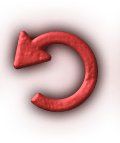
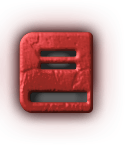
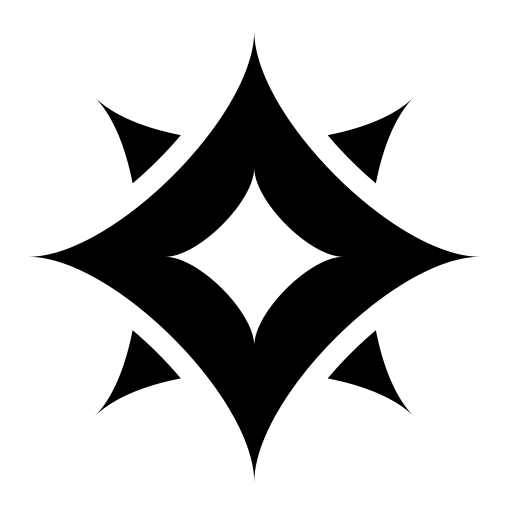
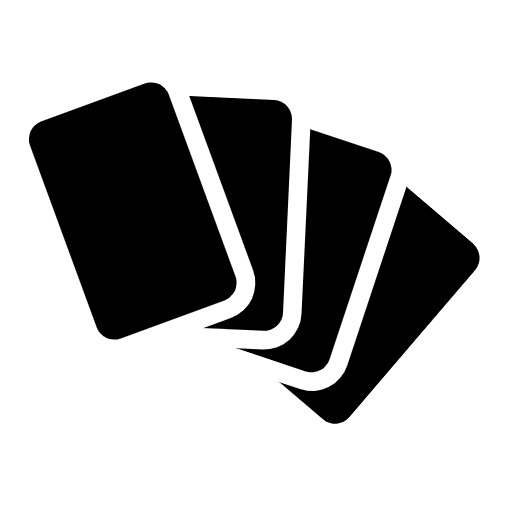
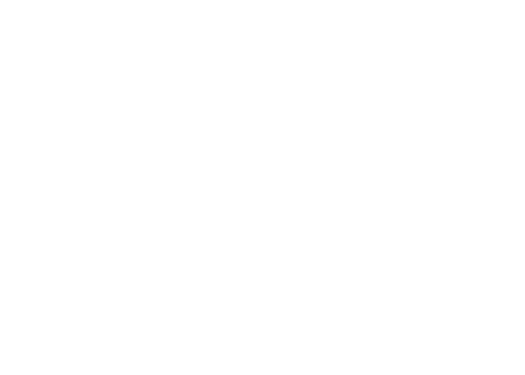
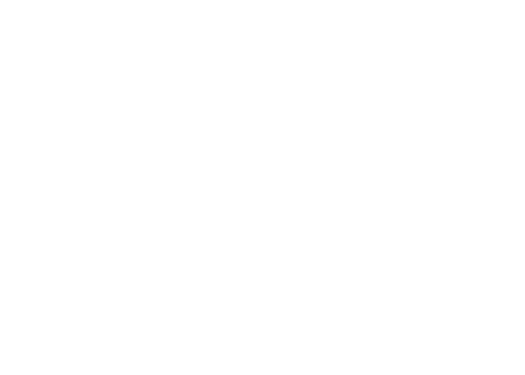
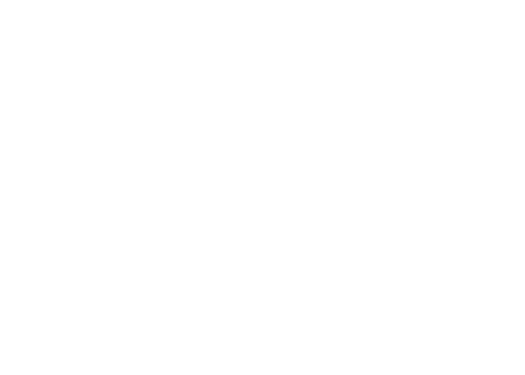
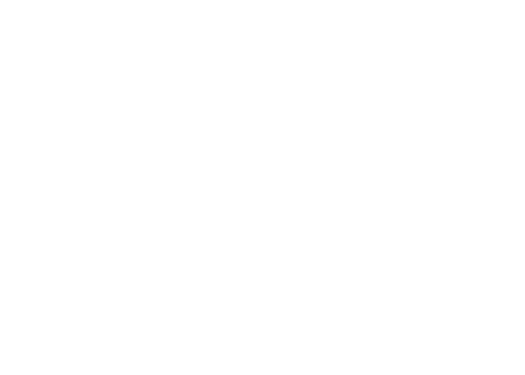
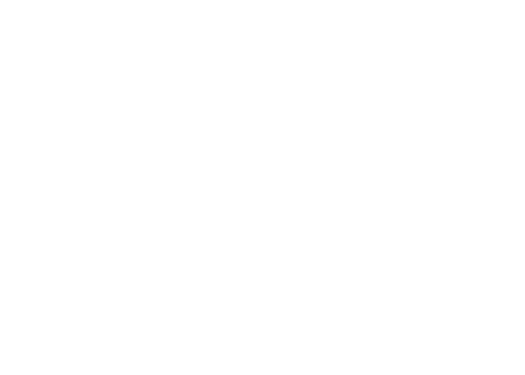
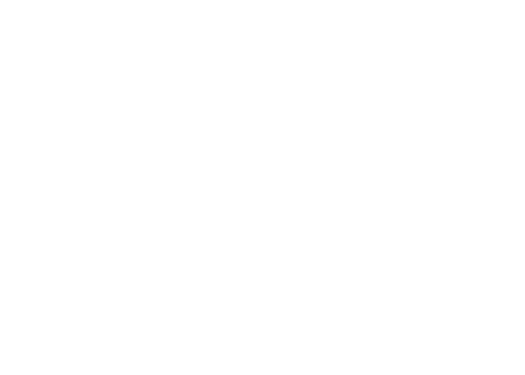
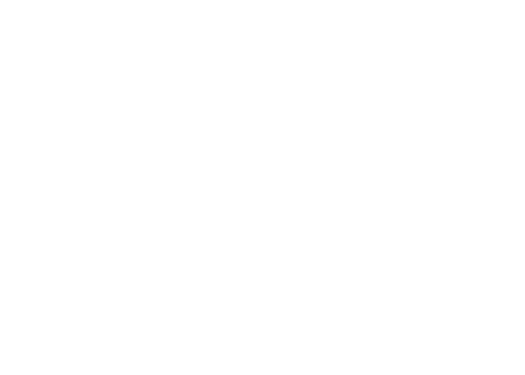
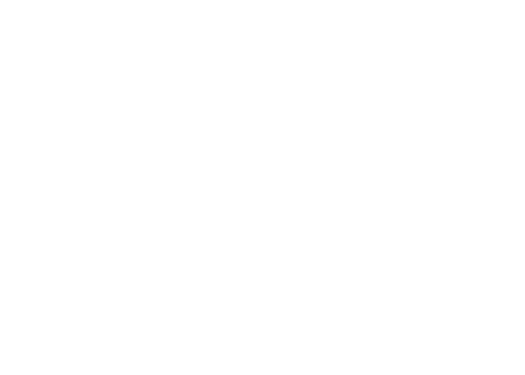
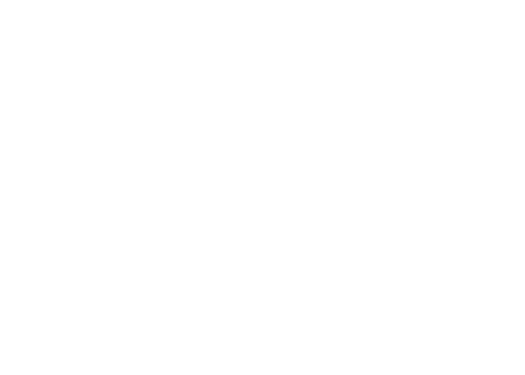
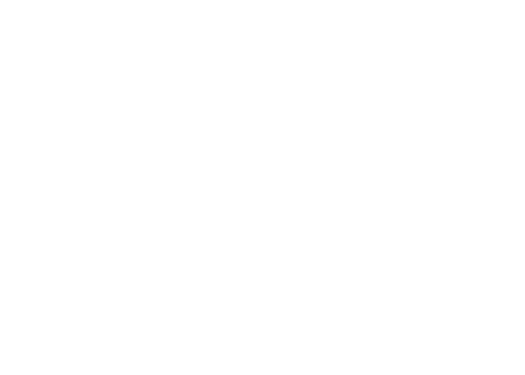
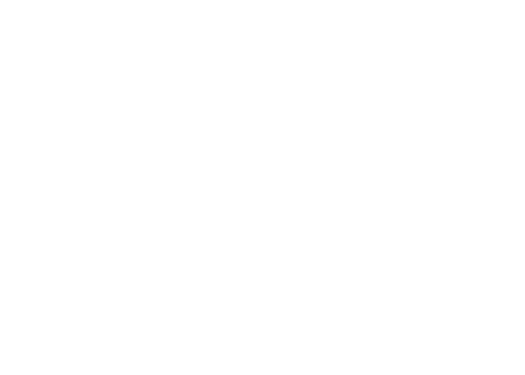
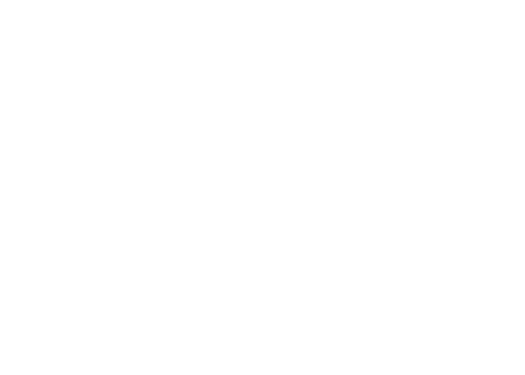
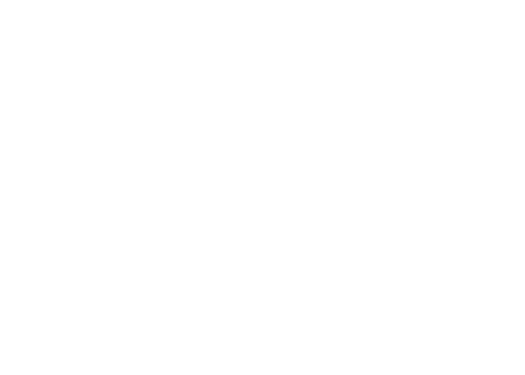
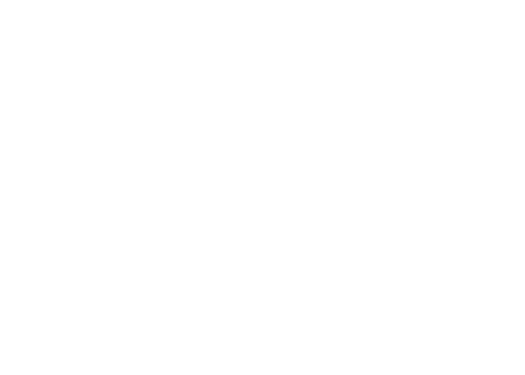
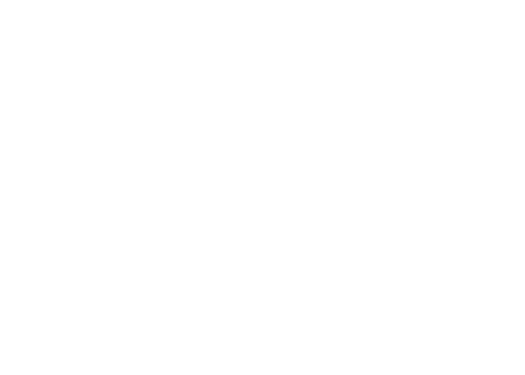
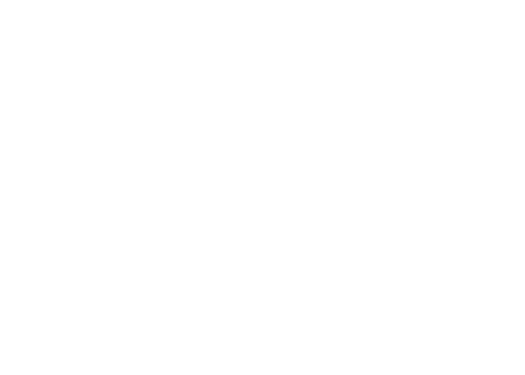
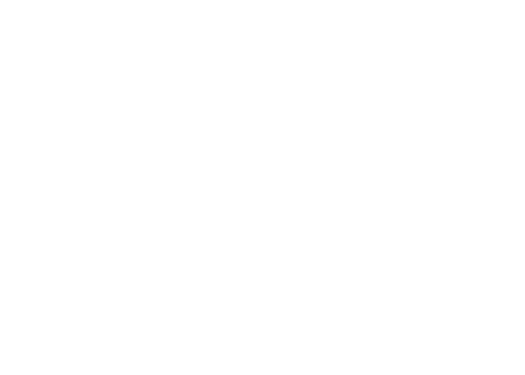
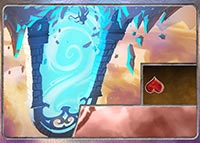
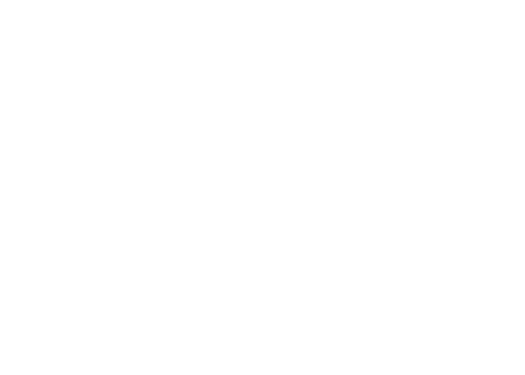
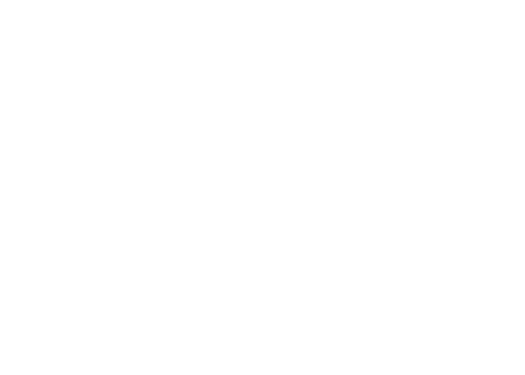
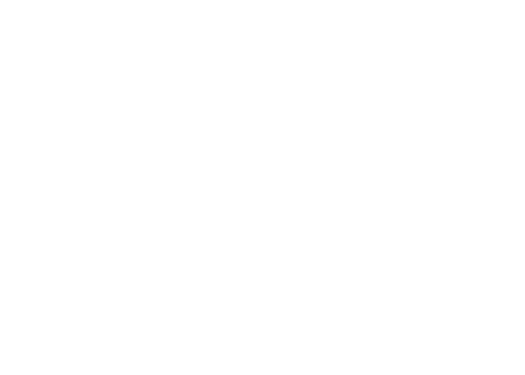
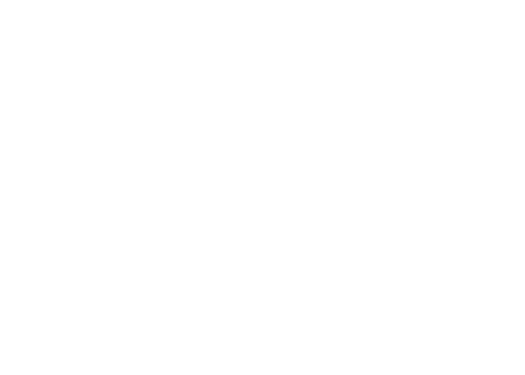
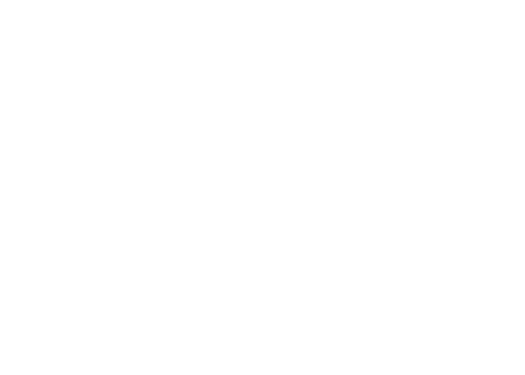
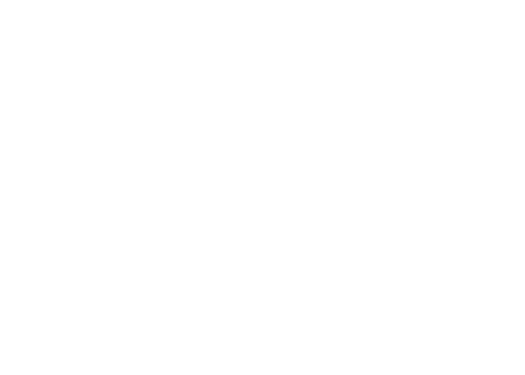
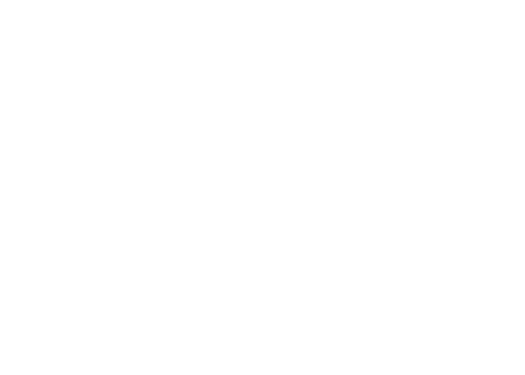
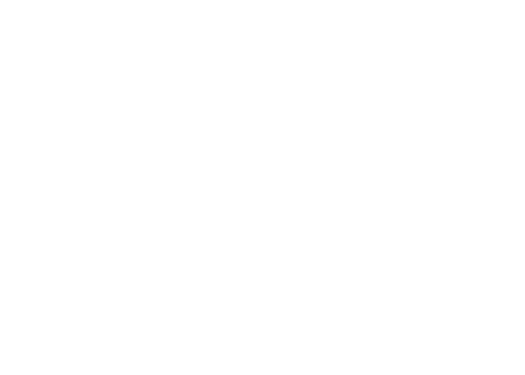
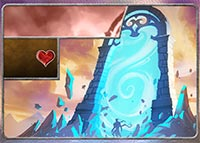
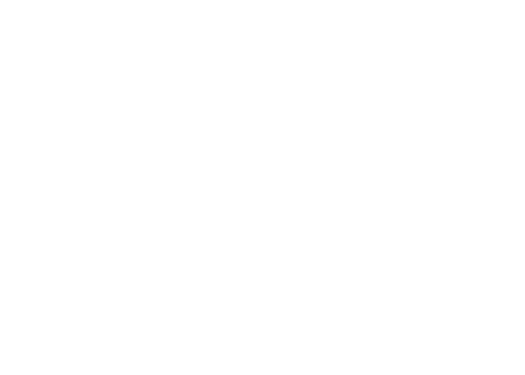
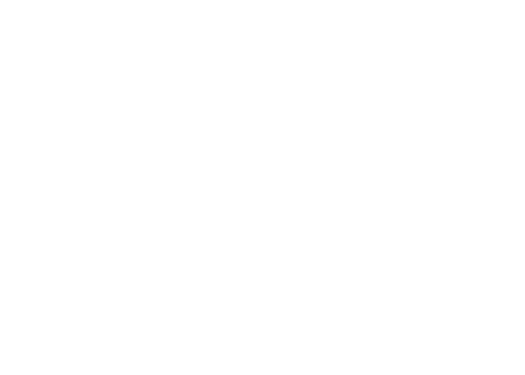
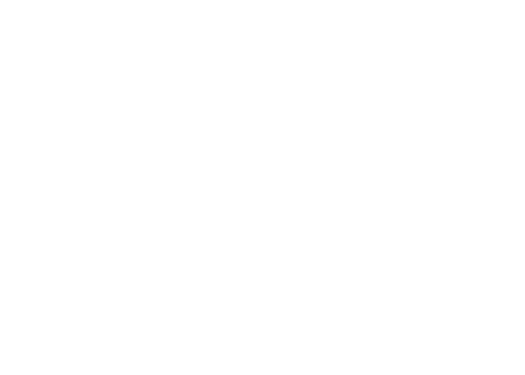
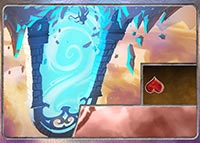
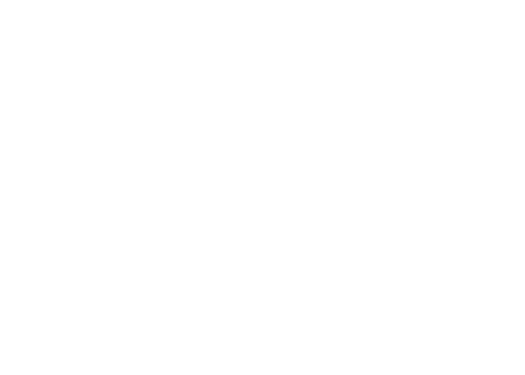
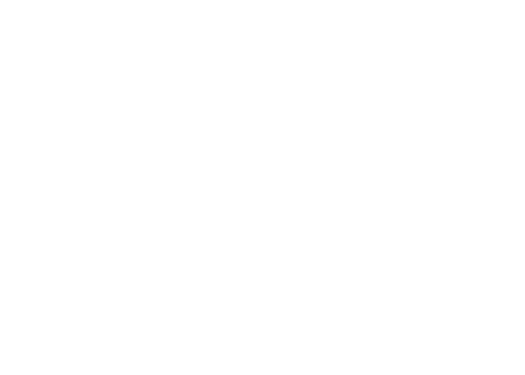
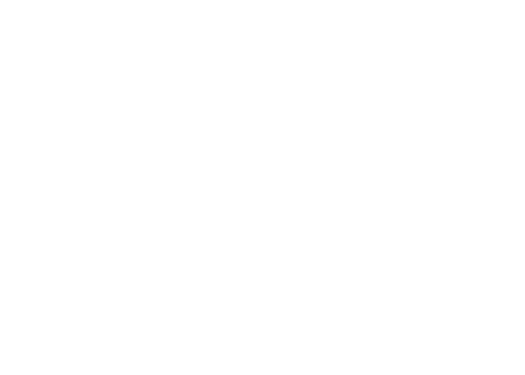
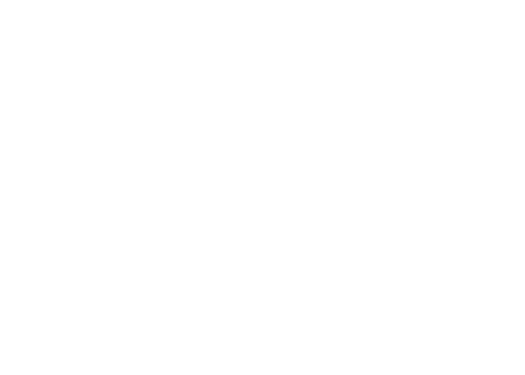
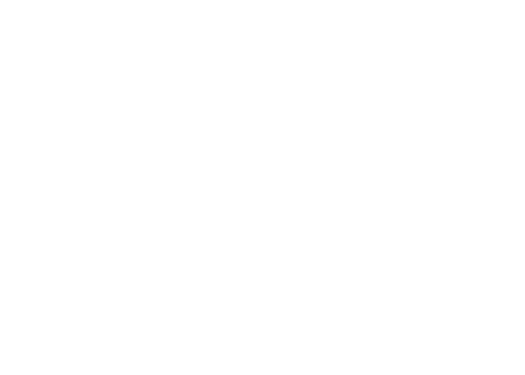
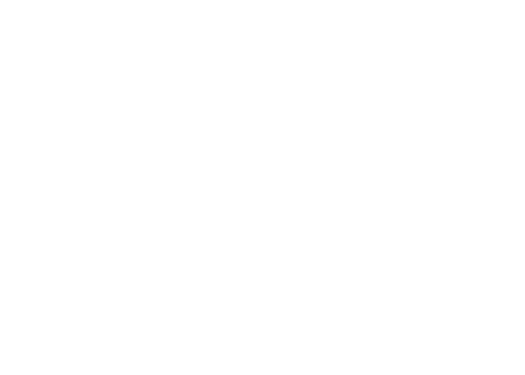
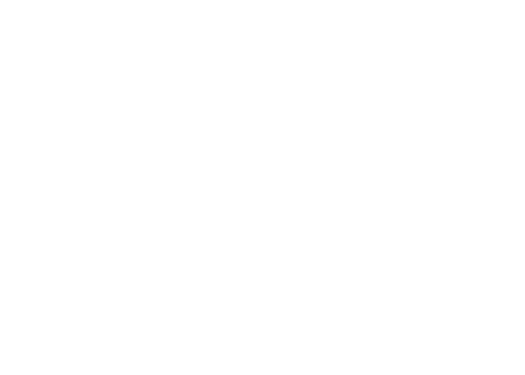
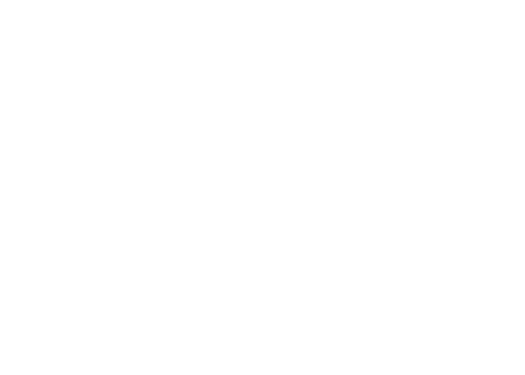
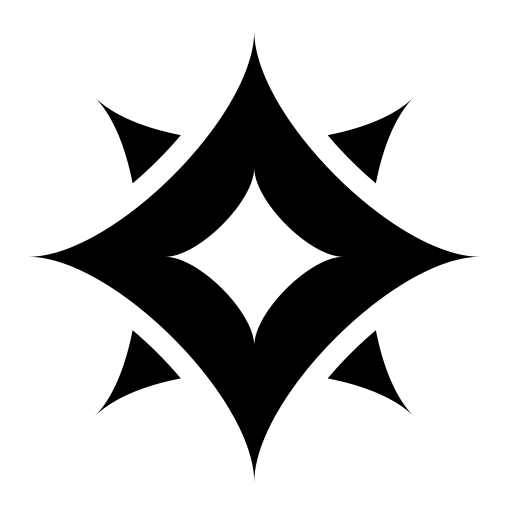
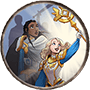
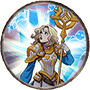
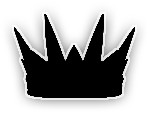
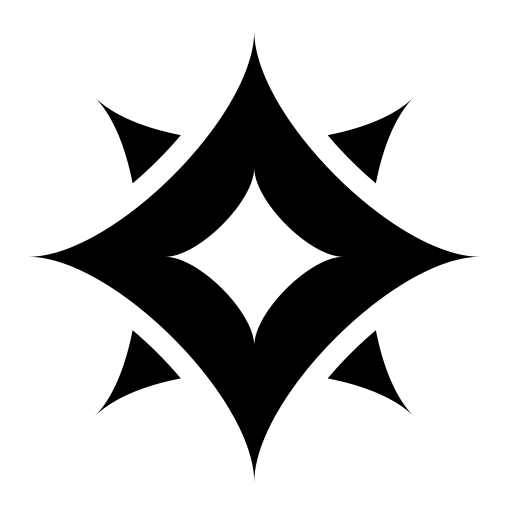
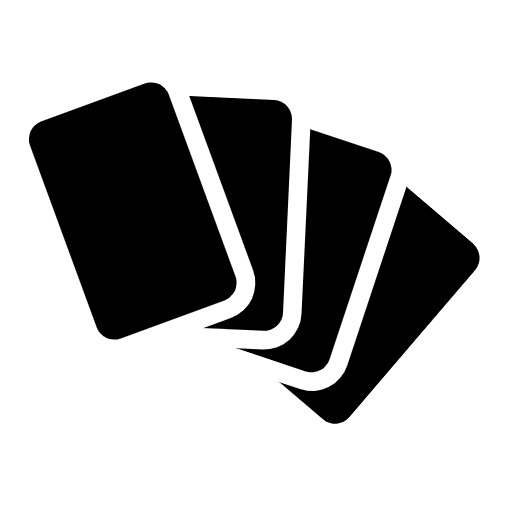
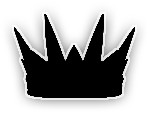
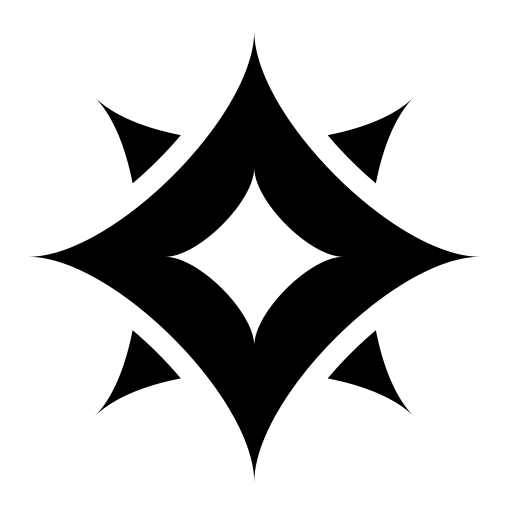
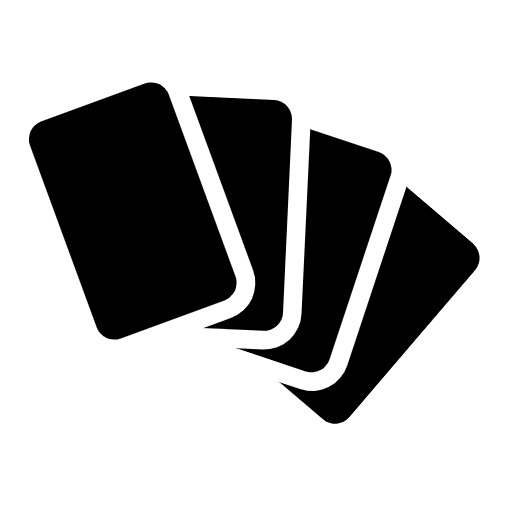
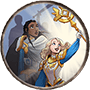
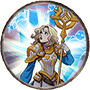

In [61]:
driver.page_source

In [ ]:
play_random_game(driver, faction=faction)

In [71]:
perform_action(driver, ['Citadel Archer', "The Citadel's Might", -1, -1, 'discard', -1, -1], faction)

['Breakers',
 'Cave Goblins',
 'Fallen Kingdom',
 'Polar Dwarves',
 'Savanna Elves',
 'Vanguards',
 'Phoenix Elves',
 'Tundra Orcs',
 'Cloaks',
 'Skyspear Avians',
 'Fungal Dwarves',
 'Eternal Council',
 'Obsidian Dwarves',
 'Sand Goblins',
 'Shadow Elves',
 'Wayfarers',
 'High Elves',
 'Swamp Orcs',
 'Crimson Order',
 'Mountain Vargath']

In [381]:
# check_harm(driver)

In [423]:
# game_over, winning_faction = check_game_over(driver)
# print(game_over, winning_faction)

True Eternal Council


In [404]:
def reshape_inputs(driver, actions, board, resources, active_events, hand, discard, deck):
    # will reshape the input using one hot encoding where needed
    for action in actions:
        print(action)

In [ ]:
# reshape_inputs(driver, actions, board, resources, active_events, hand, discard, deck)

In [ ]:
def play_game(driver):
    # while the game is still going
    done=False
    while done == False:
        check_harm(driver)
        if is_turn(driver):    
            board, resources, active_events, hand, discard, deck = get_board_state(driver)
            actions = get_available_actions(driver)
            model_inputs = reshape_inputs(driver, actions, board, resources, active_events, hand, discard, deck)
            model, done, winning_faction, chosen_action = evaluate_actions(model_inputs, random_factor, model)
            
            
        
    return model, winning_faction
    

In [ ]:
# choose an action, evaluating them?? (need to refresh on reinforcement learning here)
def evaluate_actions():
    # evaluate actions
    # choose action
    # evaluate reward after choosing action
    while is_turn(driver) == False:
        time.sleep(1)
    done, winning_faction = check_game_over(driver)
    # update weights
    